# Лабораторная работа 2

## Линейная регрессия

## Часть 1: Приближаем функции


### Метод наименьших квадратов: постановка задачи

Рассмотрим систему уравнений $Xa = y$, в которой $a$ — столбец неизвестных. Её можно переписать в векторном виде
$$x_1 a_1 + x_2 a_2 + \ldots + x_k a_k = y,$$
где $x_1,\ldots,x_k$ — столбцы матрицы $X$. Таким образом, решить исходную систему означает найти линейную комбинацию векторов $x_1,\ldots,x_k$, равную правой части. Но что делать, если такой линейной комбинации не существует? Геометрически это означает, что вектор $y$ не лежит в подпространстве $U = \langle x_1,\ldots, x_k\rangle$. В этом случае мы можем найти *псевдорешение*: вектор коэффициентов $\hat{a}$, для которого линейная комбинация $x_1 \hat{a}_1 + x_2 \hat{a}_2 + \ldots + x_k \hat{a}_k$ хоть и не равна в точности $y$, но является наилучшим приближением — то есть ближайшей к $y$ точкой $\hat{y}$ подпространства $U$ (иными словами, ортогональной проекцией $y$ на это подпростанство). Итак, цель наших исканий можно сформулировать двумя эквивалентными способами:

1. Найти вектор $\hat{a}$, для которого длина разности $|X\hat{a} - y|$ минимальна;
2. Найти ортогональную проекцию $\hat{y}$ вектора $y$ на подпространство $U$ и представить её в виде $X\hat{a}$.

Далее мы будем предполагать, что векторы $x_1,\ldots,x_k$ линейно независимы (если нет, то сначала имеет смысл выделить максимальную линейно независимую подсистему).

На лекциях было показано, что проекция вектора $y$ на подпространство $U = \langle x_1,\ldots, x_k\rangle$, записывается в виде
$$\hat{y} = X\left(X^TX\right)^{-1}X^Ty,$$
и, соответственно, искомый вектор $\hat{a}$ равен
$$\hat{a} = \left(X^TX\right)^{-1}X^Ty.$$

### Задача линейной регрессии

Начнём с примера. Допустим, вы хотите найти зависимость среднего балла S студента ФКН от его роста H, веса W, длины волос L и N — количества часов, которые он ежедневно посвящает учёбе. Представьте, что мы измерили все эти параметры для $n$ студентов и получили наборы значений: $S_1,\ldots, S_n$, $H_1,\ldots, H_n$ и так далее.

Теперь мы хотим построить **модель**, т.е. определить алгоритм, который будет принимать на вход некоторый набор параметров (в данном случае это измеренные нами $H, W, L$ и $N$), и выдавать значение некоторой **целевой переменной** (в данном примере это $S$). Тут можно подбирать много разных умных моделей, но начать имеет смысл с самой простой, линейной:

$$S = a_0 + a_1H + a_2W + a_3L + a_4N.$$

Конечно, строгой линейной зависимости нет (иначе можно было бы радостно упразднить экзамены), но мы можем попробовать подобрать коэффициенты $a_0, a_1, a_2, a_3, a_4$, удовлетворяющие вот такому требованию:
$$\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 \longrightarrow \min$$
Т.е. мы хотим, чтобы квадрат отклонения правой части от левой был поменьше для всех $n$ студентов. Введём несколько обозначений:
$X =
\begin{pmatrix}
1 & H_1 & W_1 & L_1 & N_1\\
1 & H_2 & W_2 & L_2 & N_2\\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & H_n & W_n & L_n & N_n
\end{pmatrix}, \qquad a=
\begin{pmatrix}
a_0\\ a_1\\ \vdots\\ a_4
\end{pmatrix},\qquad y=
\begin{pmatrix}
S_1\\ S_2\\ \vdots \\ S_n
\end{pmatrix}.$

Теперь наше требование выше можно переписать в таком виде:
$
\sum_{i=1}^n\left(S_i - ( a_0 + a_1H_i + a_2W_i + a_3L_i + a_4N_i)\right)^2 = |y - Xa|^2 \longrightarrow \min
$

И теперь видно, что мы получили задачу на метод наименьших квадратов!
Решая эту задачу с помощью уже известных формул, получаем оценки коэффициентов $\hat{a}_i$ ($i = 1\ldots,5$).

Теперь проговорим общую постановку задачи линейной регрессии. У нас есть $k$ переменных $x_1,\ldots,x_k$ ("регрессоров"), через которые мы хотим выразить "объясняемую переменную" $y$:
$$y = a_1x_1 + a_2x_2 + \ldots + a_kx_k$$
Значения всех переменных мы измерили $n$ раз (у $n$ различных объектов,  в $n$ различных моментов времени - это зависит от задачи). Подставим эти данные в предыдущее равенство:
$\begin{pmatrix}
y_1\\ y_2 \\ \vdots \\ y_n
\end{pmatrix} = 
a_1\begin{pmatrix}
x_{11} \\ x_{21} \\ \vdots \\ x_{n1} \end{pmatrix} + a_2\begin{pmatrix}
x_{12} \\ x_{22} \\ \vdots \\ x_{n2} \end{pmatrix} + \ldots + a_k\begin{pmatrix}
x_{1k} \\ x_{2k} \\ \vdots \\ x_{nk} \end{pmatrix}$
(здесь $x_{ij}$ - это значение $j$-го признака на $i$-м измерении). Это удобно переписать в матричном виде:
$\begin{pmatrix}
x_{11} & x_{12} & \ldots & x_{1k}\\
x_{21} & x_{22} & \ldots & x_{2k}\\
\dots & \dots & \dots & \dots\\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} \cdot
\begin{pmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{pmatrix} = 
\begin{pmatrix}
y_1 \\ y_2 \\ \vdots \\ y_n
\end{pmatrix}$
или коротко $Xa = y$. Поскольку на практике эта система уравнений зачастую не имеет решения (ибо зависимости в жизни редко бывают действительно линейными), методом наименьших квадратов ищется псевдорешение.

### Оценка качества. Обучение и тест 

После того, как вы построили регрессию и получили какую-то зависимость объясняемой переменной от регрессоров, настаёт время оценить качество регрессии. Есть много разных функционалов качества; мы пока будем говорить только о самом простом и очевидном из них: о среднеквадратичной ошибке (mean square error). Она равна
$$\frac1{n}|X\hat{a} - y|^2 = \frac1{n}\sum_{i=1}^n\left(\hat{a}_1x_{i1} + \hat{a}_2x_{i2} + \ldots + \hat{a}_kx_{ik} - y_i\right)^2$$

В целом, хочется искать модели с наименьшей mean square error на имеющихся данных. Однако слишком фанатичная гонка за минимизацией ошибки может привести к печальным последствиям, в чём Вам предстоит убедиться в ходе выполнения этой лабораторной.

Чтобы не попадать в эту ловушку, данные обычно делят на обучающие (по которым строят модель и оценивают коэффициенты) и тестовые. Лучшей стоит счесть ту модель, для которой значение функционала качества будет меньше.

### Правила оформления графиков
При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это надстройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

При выполнении этой лабораторной Вы столкнётесь с необходимостью рисовать большое количество графиков. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Метод наименьших квадратов (3.1 баллов)

**ВАЖНО! В этом задании вам нельзя использовать циклы (в том числе рекурсии, генераторы и конструкции вида map/reduce), кроме цикла в задании 1.5, который мы вам оставили. За наличие цикла в вашем коде мы поставим вам не более половины от стоимости задания.**

Скачайте файлы ``train.txt`` и ``test.txt``. Каждый из файлов содержит два столбца чисел, разделённых пробелами: в первом — некоторое число точек (значения аргумента $x$), во втором — значения некоторой функции $y = f(x)$ в этих точках, искажённые случайным шумом. Функцию $f$ мы вам не скажем. Ваша задача — по данным из файла ``train.txt`` (будем называть их обучающей выборкой) подобрать функцию $y = g(x)$, пристойно приближающую неизвестную вам зависимость.

Загрузим обучающие и тестовые данные (из файла ``test.txt``).

In [1]:
import numpy as np
import numpy.linalg as sla

from os.path import join

PATH = "./" ### Вставить заглушку (не забудьте ввести правильный путь!)

data_train = np.loadtxt(join(PATH, "train.txt"), delimiter=',')
data_test = np.loadtxt(join(PATH, "test.txt"), delimiter=',')

In [2]:
# импорты для графиков
import matplotlib.pyplot as plt

**0. [0 баллов]** Разделим значения $x$ и $y$

In [3]:
X_train = data_train[:,0]
y_train = data_train[:,1]

# Сделайте то же для тестовой выборки
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_test = data_test[:,0]
y_test = data_test[:,1]

In [4]:
xy_train = np.vstack((X_train, y_train)).T
xy_train = xy_train[xy_train[:, 0].argsort()]
X_train_sorted = xy_train[:, 0]
y_train_sorted = xy_train[:, 1]

**1. [0,15 балла]** Найдите с помощью метода наименьших квадратов линейную функцию $y = kx + b$, наилучшим образом приближающую неизвестную зависимость. Полезные функции: ``numpy.ones(n)`` для создания массива из единиц длины $n$ и ``numpy.concatenate((А, В), axis=1)`` для слияния двух матриц по столбцам (пара ``А`` и ``В`` превращается в матрицу ``[A B]``). Напечатайте этот многочлен в виде $kx+b$.

Что надо сделать? Надо найти вектор $\hat{a}$ (размер которого - $2 \times 1$), для которого $|X\hat{a} - y|$ - минимальна.
Причем, $X = \begin{pmatrix} 1 & X_{1} \\ 1 & X_{2} \\ \vdots & \vdots \\ 1 & X_{n} \end{pmatrix}, y = \begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix}$. По формуле с лекции, $\hat{a} = (X^TX)^{-1}X^Ty$

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_matrix = np.vstack((np.ones(X_train.size), X_train)).T
a_result_train = np.dot((np.dot(sla.inv(np.dot(np.transpose(X_matrix), X_matrix)),np.transpose(X_matrix))),y_train)
print ("y_train =",  a_result_train[1], "* x + ", a_result_train[0])



y_train = 4.0483560781067425 * x +  2.4539322330626554


**2. [0,15 балла]** Нарисуйте на плоскости точки $(x_i, y_i)$ из обеих выборок и полученную линейную функцию.

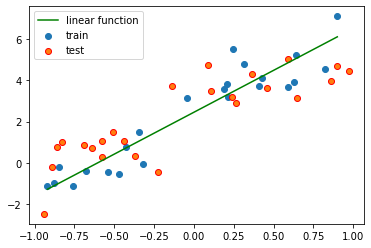

In [6]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots()

ax.scatter(X_train, y_train, label="train")
ax.scatter(X_test, y_test, edgecolor="r", label="test")

ax.plot(X_train_sorted, X_train_sorted*a_result_train[1] + a_result_train[0], color="g", label="linear function")

ax.legend()

plt.show()

**3. [0,4 балла]** Глядя на данные, подумайте, многочленом какой степени можно было бы лучше всего приблизить эту функцию с точки зрения минимизации среднеквадратичной ошибки на обучающей выборке. Найдите этот многочлен и сохраните его коэффициенты в массив `poly_coef` (от младшего члена к старшему). Обязательно обоснуйте выбор степени многочлена.

Итак, график многочлена должен проходить через 23 точки вида $(x_i, y_i)$, причем $x_i \neq x_j \ \forall i \neq j $ (это понятно, если посмотреть на тестовые данные).
Тогда степень многочлена будет не больше 22 (по определению [интерполяционного многочлена Лагранжа](https://ru.wikipedia.org/wiki/Интерполяционный_многочлен_Лагранжа))

Чтобы найти искомые коэффициенты, решим СЛУ вида $Ma = y_{train}$, где $M$ - матрица, в $i$-й строке которой степени $x_{train_i}$ от 0 до 23 (или - матрица Вандермонда системы $x_{train}$), $a$ - столбец искомых коэффициентов от младшего к старшему


In [7]:
M = np.fliplr(np.vander(X_train, len(X_train)))

poly_coef = sla.solve(M, y_train)
print(poly_coef)


[-5.48926514e+02 -6.14629992e+03  1.39862350e+05 -1.18645078e+05
 -5.21073667e+06  1.05245214e+07  8.93727181e+07 -2.08484739e+08
 -8.92060963e+08  2.06324794e+09  5.70521924e+09 -1.19453674e+10
 -2.43891768e+10  4.27058091e+10  7.04031899e+10 -9.50454787e+10
 -1.35000506e+11  1.27622206e+11  1.63800386e+11 -9.41576230e+10
 -1.12998861e+11  2.91737894e+10  3.35216943e+10]


**4. [0,15 балла]** Нарисуйте его график на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок. Удалось ли графику пройти через все точки из выборки? Попробуйте объяснить, почему?



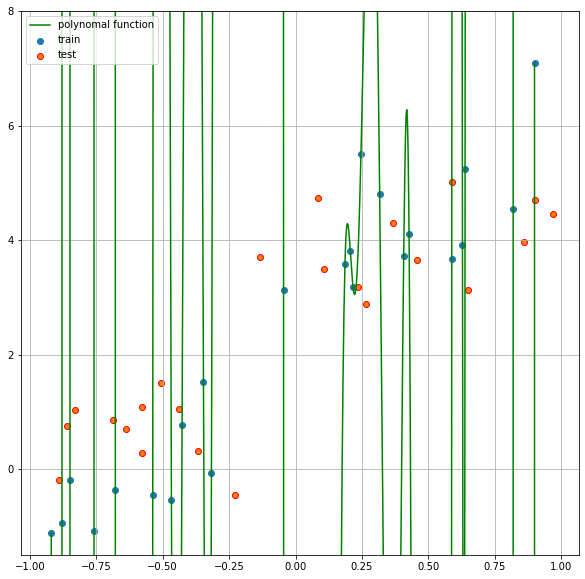

In [8]:
def f(x):
  x_line = np.dot(x, np.ones(X_train.size))
  x_line = np.power(x_line, range(X_train.size))
  return np.dot(x_line.reshape((1, x_line.size)), poly_coef.reshape(poly_coef.size, 1))


y = np.vectorize(f)


fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(X_train, y_train, label="train")
ax.scatter(X_test, y_test, edgecolor="r", label="test")

poly_x = np.linspace(min(X_train), max(X_train), 1000)

ax.plot(poly_x, y(poly_x), label = "polynomal function", color="g")

ax.grid()
ax.legend()
plt.ylim([-1.5, 8.0])
plt.show()

Графику удалось пройти через все точки из обучающей выборки, потому что СЛУ, описанная выше, оказалась совместной. А вот с тестовой выборкой результат хуже - оно и понятно, эти точки вообще не участвовали в расчетах 

**5. [0,5 балла]** Для $k = 1,2,3,\ldots,10$ найдите многочлен $\hat{f}_k$ степени $k$, наилучшим образом приближающий неизвестную зависимость. Сохраните найденные коэффициенты многочленов в матрицу `poly_coefs` (коэффициенты многочлена степени $j$ должны быть сохранены в $j$-й строке матрицы от младшего члена к старшему).

Как искать $\hat{f}_q$? Будем рассматривать матрицы размера $X\_train.size \times (q + 1)$ и искать коэффициенты как в 1.1.
В матрице будет 11 столбцов и 10 строк

In [9]:
poly_coefs = np.empty((0, 11), dtype=float)
test = np.array([2, 3, 4, 5, 6])
for k in range(1, 11):
  # строим матрицу M - матрицу вандермонда соответствующего размера
  M = np.vander(X_train, k + 1)
  # переворачиваем (чтобы младшие коэф-ты были в начале)
  M = np.fliplr(M)
  # a = (M^TM)^(-1)My
  a = np.dot(np.dot(sla.inv(np.dot(np.transpose(M), M)), np.transpose(M)), y_train)
  # дозаполняем массив нулями
  if a.size < 11:
    a = np.concatenate((a, np.zeros(11 - a.size)), axis=0)
  # складываем в матрицу
  a = np.reshape(a, (1, 11))
  poly_coefs = np.append(poly_coefs, a, axis=0)


# Простая проверка, что матрица poly_coefs имеет столько строк, сколько нужно
print(poly_coefs)
assert poly_coefs.shape[0] == 10

[[   2.45393223    4.04835608    0.            0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   2.5694219     4.01015943   -0.3551553     0.            0.
     0.            0.            0.            0.            0.
     0.        ]
 [   2.54688319    4.7869345    -0.41165762   -1.41634742    0.
     0.            0.            0.            0.            0.
     0.        ]
 [   3.25302411    4.49788737   -6.92753076   -0.76232916    7.97572932
     0.            0.            0.            0.            0.
     0.        ]
 [   3.11521784    6.42425264   -6.36050064  -11.18097856    7.592385
    10.50504691    0.            0.            0.            0.
     0.        ]
 [   3.07558089    6.47067818   -5.70379442  -11.41476149    5.49711076
    10.73774703    1.6944096     0.            0.            0.
     0.        ]
 [   3.14869778    5.21297457   -5.66934112    1.33536686    3.71785229
   -21.42004699    3.83322656   22.8

**6. [0,6 балл]** Для каждого из многочленов из задания 1.5, а также для многочлена из задания 1.4 найдите среднеквадратическую ошибку на обучающих данных и на тестовых данных: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$. Полученные значения ошибок сохраните в матрицу `errors` высоты 11 и ширины 2. В первом столбце матрицы должны стоять значения ошибок на тренировочных данных, во втором --- на тестовых. В первых 10 строках матрицы должны стоять значения ошибок для многочленов соответствующих степений из задания 1.5, в 11-й строке --- значение ошибки для многочлена из задания 1.4.


Как планируется это считать: (для train и test это считается одинаково, так что обозначим данные просто $X, Y$ соотв)

Создадим матрицу $P$ - матрицу Вандермонда для $X$. ($P = \begin{pmatrix}
1 & x_1 & \ldots & x^n_1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_m & \ldots & x^n_m \\
\end{pmatrix} $)

Теперь возьмем матричку с коэффициентами для многочленов ($PC = poly\_coefs$ +
$poly\_coef$). Пусть на $ij$ месте в ней стоит $c_{ij}$ - коэффициент при $j - 1$
 степени в многочлене со старшей степенью $i$

Тогда $P \cdot PC^T = \begin{pmatrix}
1 & x_1 & \ldots & x^n_1 \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_m & \ldots & x^n_m \\
\end{pmatrix} \cdot $
$\begin{pmatrix}
c_{11} & c_{21} & \ldots & c_{k1} \\
c_{12} & c_{22} & \ldots & c_{k2} \\
\vdots & \vdots & \ddots & \vdots \\
c_{1n} & c_{2n} & \ldots & c_{kn}
\end{pmatrix}$, где $k = 11$ - число многочленов.Что такое многочлен $g(x_i)$
(или какой-то многочлен из 1.5 или многочлен из 1.4 -- неважно)? Это
$\begin{pmatrix}
1 & x_i & \ldots & x^n_i
\end{pmatrix} \cdot $
$\begin{pmatrix}
c_{g1} \\ c_{g2}\\ \vdots \\ c_{gn}
\end{pmatrix}$, где $c_{gj}$ - коэфт в многочлене $g$ при степени $j - 1$

Для удобства обозначим многочлен из 1.4 как $\hat{f}_{11}$

Поучаем, что $ P \cdot PC^T = \begin{pmatrix}
\hat{f}_{1}(x_1) & \hat{f}_{2}(x_1) & \ldots & \hat{f}_{11}(x_1) \\
\vdots & \vdots & \ddots & \vdots \\
\hat{f}_{1}(x_m) & \hat{f}_{2}(x_m) & \ldots & \hat{f}_{11}(x_m)\\
\end{pmatrix}$. Теперь дело за малым: формируем матричку игреков (по сути - 11
раз дублируем наш столбик), вычитаем из матрички с многочленами, поэлементно возводим
в квадрат, суммируем по столбцам, делим на $n$ и записываем в матричку $error$


In [10]:
def MSE(X, y, coefs):
    x_pows = np.fliplr(np.vander(X, coefs.shape[1]))
    n = X.shape[0]
    polynoms_vals = np.dot(x_pows, np.transpose(coefs))
    polynoms_vals -= y.reshape(y.size, 1)
    polynoms_vals = np.power(polynoms_vals, 2)
    return (1/n)*np.sum(polynoms_vals, axis=0).reshape(1, polynoms_vals.shape[1])


matrix_size = poly_coef.size
poly_coefs_with_zeros = np.concatenate((poly_coefs, np.zeros((poly_coefs.shape[0], 
                                                              matrix_size - poly_coefs.shape[1]))), axis=1)

PC = np.concatenate((poly_coefs_with_zeros, poly_coef.reshape((1, matrix_size))), axis=0)
errors = np.transpose(np.concatenate((MSE(X_train, y_train, PC),
                         MSE(X_test, y_test, PC)), axis=0))
print(errors)



[[7.00912588e-01 1.64930169e+00]
 [6.91992919e-01 1.56859711e+00]
 [6.53662070e-01 1.48196170e+00]
 [4.52989800e-01 2.25266387e+00]
 [3.69973832e-01 2.41600793e+00]
 [3.69614394e-01 2.49195289e+00]
 [3.54844465e-01 3.18560667e+00]
 [3.52453365e-01 3.59296147e+00]
 [3.38277875e-01 5.26186318e+00]
 [3.32784411e-01 7.99284845e+00]
 [3.09229713e-11 6.65763342e+14]]


**7. [0,5 балла]** Для $k = 1,2,3,4,6$ нарисуйте графики полученных многочленов на одном чертеже вместе с точками $(x_i, y_i)$ из обеих выборок (возможно, график стоит сделать побольше; это делается командой `plt.figure(figsize=(width, height))`).

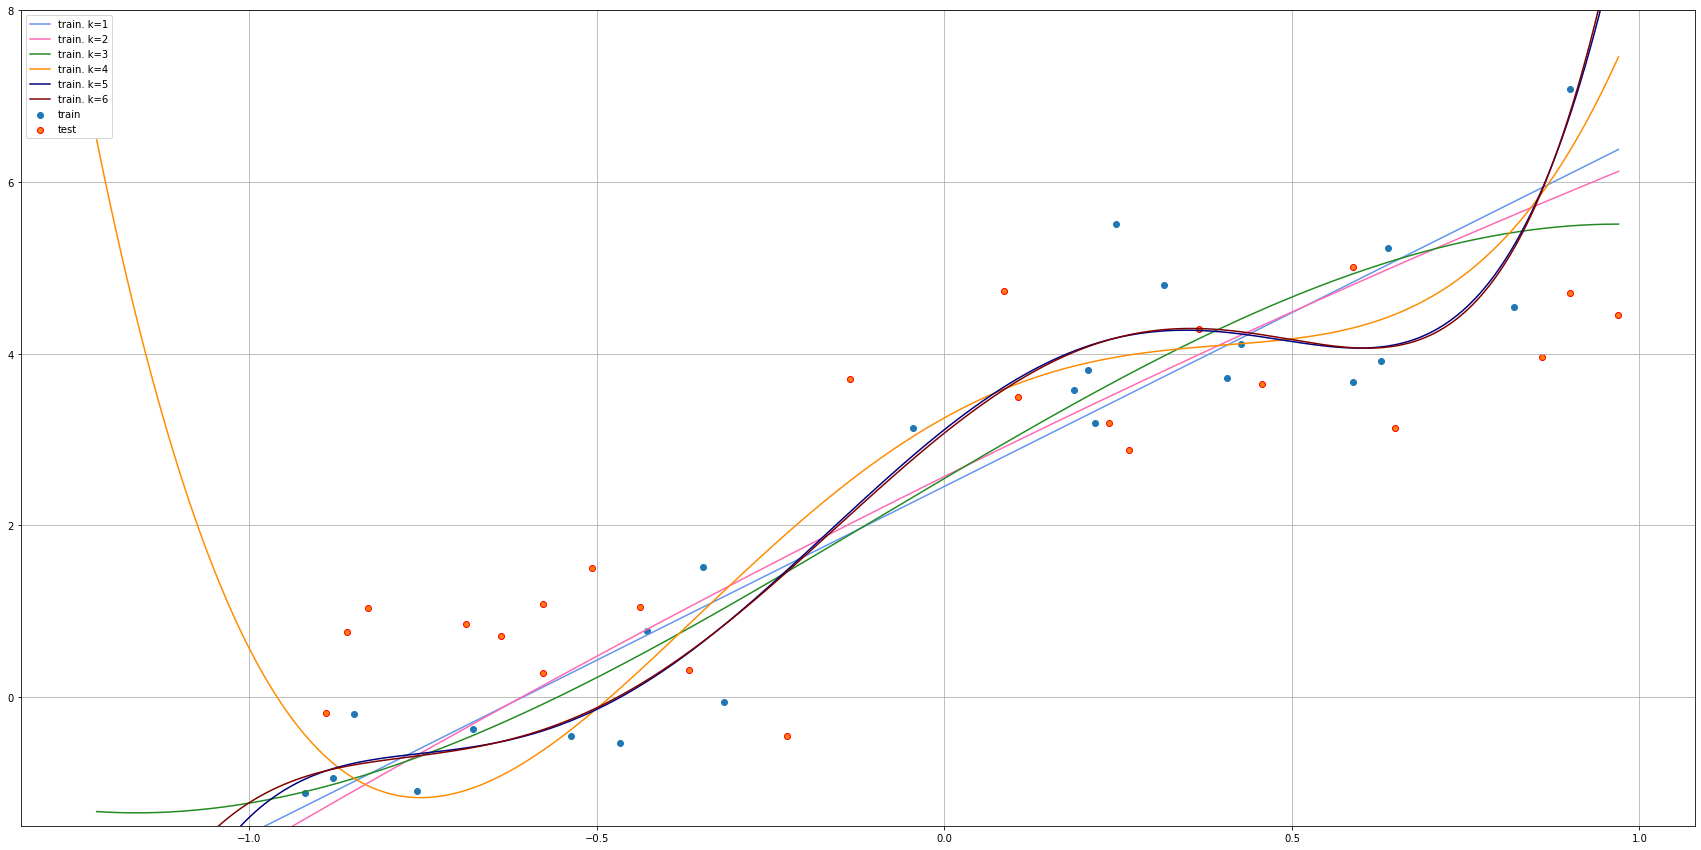

In [11]:
fig, ax = plt.subplots(figsize=(30, 15))

ax.scatter(X_train, y_train, label="train")
ax.scatter(X_test, y_test, edgecolor="r", label="test")

poly_x_train = np.linspace(min(min(X_train) - 0.3, min(X_test)), max(max(X_train), max(X_test)), 1000)

ax.plot(poly_x_train, poly_coefs[0][0] + poly_coefs[0][1]*poly_x_train,
        label = "train. k=1", color="cornflowerblue")
ax.plot(poly_x_train,
        poly_coefs[1][0] + poly_coefs[1][1]*poly_x_train +
        poly_coefs[1][2]*poly_x_train**2,
        label = "train. k=2", color="hotpink")
ax.plot(poly_x_train,
        poly_coefs[2][0] + poly_coefs[2][1]*poly_x_train +
        poly_coefs[2][2]*poly_x_train**2 + poly_coefs[2][3]*poly_x_train**3,
        label = "train. k=3", color="forestgreen")
ax.plot(poly_x_train, poly_coefs[3][0] + poly_coefs[3][1]*poly_x_train +
        poly_coefs[3][2]*poly_x_train**2 + poly_coefs[3][3]*poly_x_train**3 +
        poly_coefs[3][4]*poly_x_train**4,
        label = "train. k=4", color="darkorange")
ax.plot(poly_x_train, poly_coefs[4][0] + poly_coefs[4][1]*poly_x_train +
        poly_coefs[4][2]*poly_x_train**2 + poly_coefs[4][3]*poly_x_train**3 +
        poly_coefs[4][4]*poly_x_train**4 + poly_coefs[4][5]*poly_x_train**5,
        label = "train. k=5", color="navy")
ax.plot(poly_x_train, poly_coefs[5][0] + poly_coefs[5][1]*poly_x_train +
        poly_coefs[5][2]*poly_x_train**2 + poly_coefs[5][3]*poly_x_train**3 +
        poly_coefs[5][4]*poly_x_train**4 + poly_coefs[5][5]*poly_x_train**5 +
        poly_coefs[5][6]*poly_x_train**6,
        label = "train. k=6", color="maroon")


ax.grid()

ax.legend()
plt.ylim([-1.5, 8.0])
plt.show()

**8. [0,65 балла]** Что происходит с ошибкой на тестовых данных при росте степени многочлена? Казалось бы, чем больше степень, тем более сложным будет многочлен и тем лучше он будет приближать нашу функцию. Подтверждают ли это ваши наблюдения? Как вам кажется, чем объясняется поведение ошибки на тестовых данных при $k = 10$? Как называется наблюдаемый вами эффект?

**Ответ:** Если посмотреть на тестовые данные, самой хорошей степенью будет
степень многочлена 3 (у такого многочлена самая маленькая квадратичная ошибка).
Кажется, чем выше степень многочлена, тем больше мы подгоняем функцию под
тренировочные данные, из-за чего в конечном итоге теряем в точности на
тестовых данных. Кроме того, чем больше надо считать, тем больше это занимает
вычислительной мощности и времени, что не может быть очень хорошо.
Такой эффект, вроде бы, называется переобучение.


## Часть 2: Обучаем машины

### Задание 2. Линейная регрессия (3 балла)

В этом задании вам предстоит заняться предсказанием цен на алмазы. Скачайте файл `diamonds_features.csv`, содержащий данные, с которыми вам предстоит работать. Запустите следующую ячейку:

In [12]:
data = np.loadtxt("diamonds_features.csv", delimiter=",", dtype="str")[1:, :]
print(data[:5, :])

[['0.8' 'Ideal' 'F' 'VS1' '62.4' '55.0' '5.92' '5.88' '3.68' '3884']
 ['0.91' 'Premium' 'F' 'SI2' '61.4' '60.0' '6.23' '6.21' '3.82' '3618']
 ['1.28' 'Premium' 'I' 'VS2' '61.7' '60.0' '7.05' '6.95' '4.32' '6762']
 ['0.41' 'Very Good' 'F' 'SI1' '61.9' '55.0' '4.78' '4.81' '2.97' '769']
 ['1.07' 'Premium' 'F' 'SI2' '61.8' '59.0' '6.53' '6.57' '4.05' '4560']]


In [13]:
# делим на X и y -- все данняе и цены соответственно 
X = data[:,0:-1]
y = data[:,-1]

Мы вывели для вас первые 5 строчек данных. Описания значений в колонках вы можете найти в файле `diamonds_descriptions.txt`.

Глобально в этом задании вам предстоит научиться строить модель линейной регрессии для предсказания цены алмаза по его признакам. Данные устроены таким образом, что в каждой строчке располагаются признаки, описывающие объект (алмаз), а в каждой фиксированной колонке --- всевозможные значения конкретного признака для всех объектов в данных.

**0. [0 баллов]** Разделите выборку на обучающую и тестовую. Делать это лучше случайным образом (ведь вы не знаете, как создатели датасета упорядочили объекты); рекомендуем вам для этого функцию [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) с параметром `test_size=0.3`. Обязательно зафиксируйте параметр `random_state`.

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split
rand_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_state)

Теперь у вас есть две выборки, каждая из которых содержит случайное подмножество наших данных. Обучающую выборку мы в дальнейшем будем использовать для обучения модели линейной регрессии, а тестовую, соответственно, для теста.

**ВАЖНО: за обучение модели на тестовой выборке будем ставить 0 за весь пункт!**

### Работаем с числовыми данными

Сейчас ваши данные содержат как привычные вам числовые признаки, описывающие объект, так и категориальные признаки, которые описывают принадлежность объекта к той или иной категории, и в данных представляются строками. Что делать с данными, которые представлены строками --- мы разберёмся чуть позже, а пока давайте забудем, что они у нас есть, и будем работать только с числовыми.

**0,5. [0 баллов]** Заполните переменные `numeric_features` и `categorical_features` индексами столбцов в данных, содержащих числовые и категориальные признаки соответственно. После этого можно проверить, что массив `data[:, numeric_features]` содержит только числовые данные.

In [15]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
numeric_features = [0, 4, 5, 6, 7, 8]
categorical_features = [1, 2, 3]
print(data[:, numeric_features])

[['0.8' '62.4' '55.0' '5.92' '5.88' '3.68']
 ['0.91' '61.4' '60.0' '6.23' '6.21' '3.82']
 ['1.28' '61.7' '60.0' '7.05' '6.95' '4.32']
 ...
 ['0.31' '61.4' '56.0' '4.38' '4.41' '2.7']
 ['0.36' '62.0' '59.0' '4.56' '4.51' '2.81']
 ['0.31' '59.0' '62.0' '4.41' '4.43' '2.61']]


In [16]:
X_train_num = X_train[:, numeric_features].astype(float)
X_test_num = X_test[:, numeric_features].astype(float)
X_train_cat = X_train[:, categorical_features]
X_test_cat = X_test[:, categorical_features]

y_train_float = y_train.astype(float)
y_test_float = y_test.astype(float)


**1. [0,3 баллов]** Решите задачу линейной регрессии для предсказания цены алмаза по его числовым признакам (не забудьте, что линейная модель должна также содержать свободный от признаков член) и протестируйте ваше решение на тестовых данных. Выведите полученные регрессионные коэффициенты для каждого признака. Попробуйте проинтерпретировать полученные коэффициенты: сравните их друг с другом, посмотрите на их знаки и на абсолютную величину и попробуйте на основе этого придать им житейский смысл. Согласуется ли построенная интерпретация модели с вашими представлениями о жизни? 

*Примечание: обратите внимание, сейчас все данные у вас хранятся в строковом виде. Чтобы работать с ними как с числами, необоходимо явно привести их к типу float. В NumPy для этого есть специальная удобная команда astype.*

***Две супер важные функции***

In [17]:
def predict_linear(train_data, train_ans, test_data, to_delete=False, del_indicies = [4, 10, 17]):
    train_rows = train_data.shape[0]
    test_rows = test_data.shape[0]
    
    train_matrix = np.concatenate((np.ones(train_rows).reshape((train_rows, 1)), train_data), axis=1)
    test_matrix = np.concatenate((np.ones(test_rows).reshape((test_rows, 1)), test_data), axis=1)
    
    if to_delete:
        for i in del_indicies:
            train_matrix = np.delete(train_matrix, i, 1)
            test_matrix = np.delete(test_matrix, i, 1)
    
    coefs = np.dot(np.dot(sla.inv(np.dot(train_matrix.T, train_matrix)), train_matrix.T), train_ans)
    pred_y_test = np.dot(test_matrix, coefs)
    pred_y_train = np.dot(train_matrix, coefs)
    
    return coefs, pred_y_test, pred_y_train

In [18]:
def MSE(lhs, rhs):
    return np.square(np.subtract(lhs, rhs)).mean()
    

In [19]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
res_coefs, pred_test_y1, pred_train_y1 = predict_linear(X_train_num, y_train_float, X_test_num)

In [20]:
print("свободный член - ", res_coefs[0])
print("-------")
print("carats - ", res_coefs[1])
print("depth - ", res_coefs[2])
print("table - ", res_coefs[3])
print("x - ", res_coefs[4])
print("y - ", res_coefs[5])
print("z - ", res_coefs[6])

свободный член -  20320.693832775578
-------
carats -  10786.237940075162
depth -  -199.27867510969435
table -  -95.04055850861039
x -  -1308.0801101708469
y -  24.327258330828464
z -  37.04825215503519


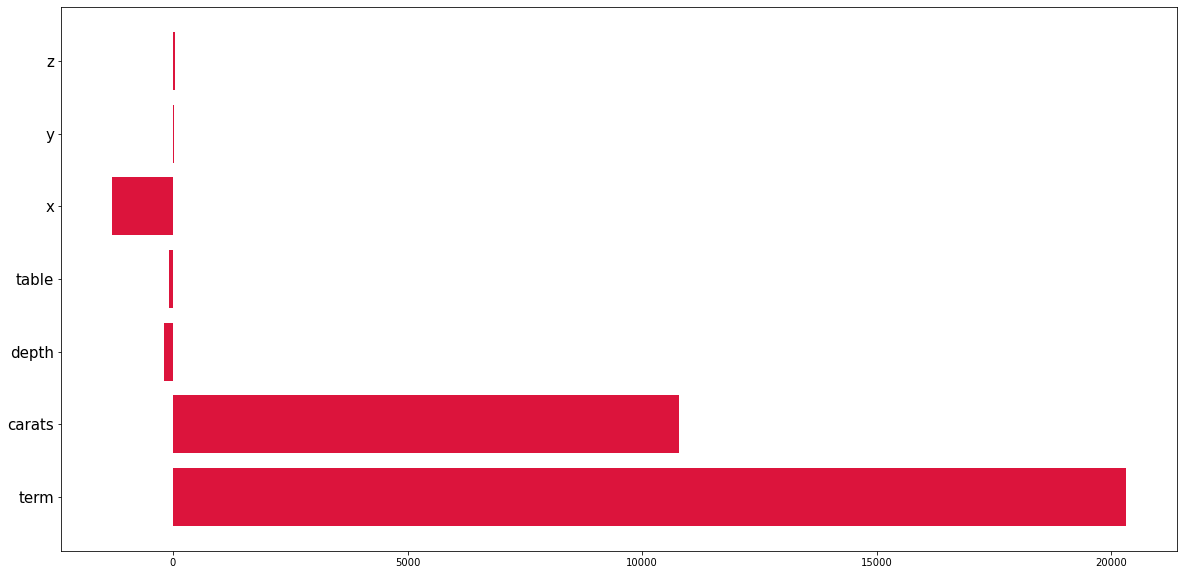

In [21]:
labels = ["term", "carats", "depth", "table", "x", "y", "z"]
position = np.arange(res_coefs.size)

fig, ax = plt.subplots()

ax.barh(position, res_coefs, color="crimson")

#  Устанавливаем позиции тиков:
ax.set_yticks(position)

#  Устанавливаем подписи тиков
ax.set_yticklabels(labels,
                   fontsize = 15)

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

Теперь построим график (чтобы наглядно посмотреть на отличия)

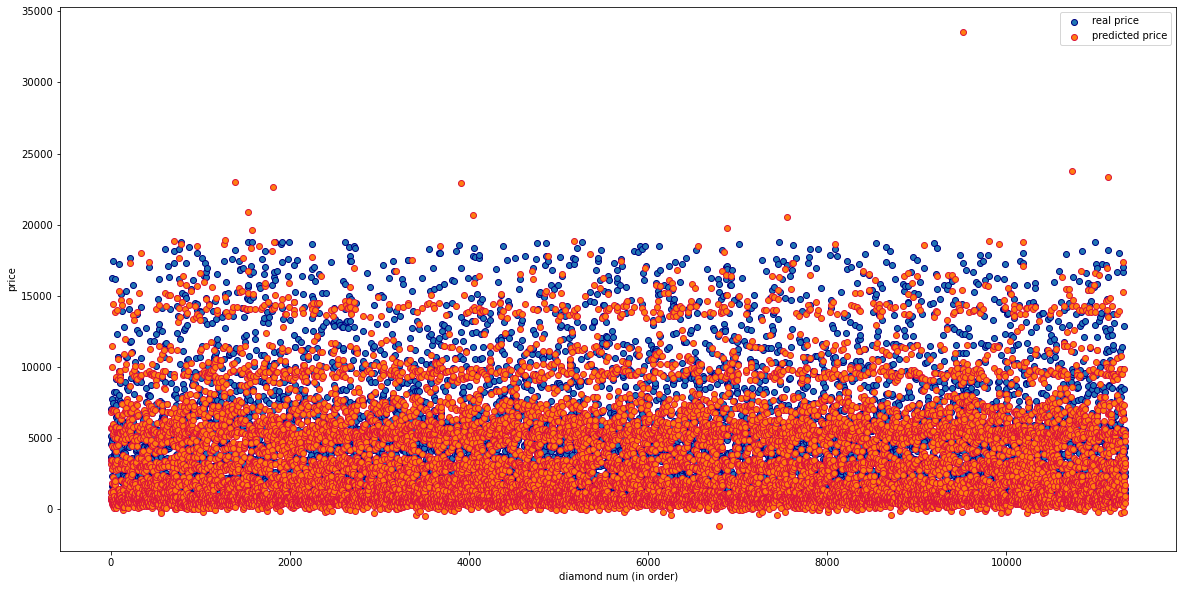

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))

plot_x = np.arange(y_test.size)



ax.scatter(plot_x, y_test_float, label="real price", edgecolor="navy")
ax.scatter(plot_x, pred_test_y1, edgecolor="crimson", label="predicted price")

plt.xlabel("diamond num (in order)")
plt.ylabel("price")

ax.legend()

plt.show()

И, конечно,на MSE:

In [23]:
print("на тестовых данных", MSE(pred_test_y1, y_test_float))
print("на тренировочных данных", MSE(pred_train_y1, y_train_float ))

на тестовых данных 2113575.91712056
на тренировочных данных 2279751.0608263165


Интерпретация модели здесь: 

Самый большой коэффициент (за исключением свободного члена) - при числе карат и это логично (чем больше карат, тем больше алмаз стоит, логично, в общем, что караты много значат)

Дальше самый большой по модулю, но не по знаку - коэффициент при длине в мм. Все бы сочеталось с моими представлениями о жизни, если бы он не был отрицательным, и если бы его модуль был бы похож на модуль коэффициента при ширине

На графике, кстати, видно, что алмазы с низкой ценой предсказываются лучше

Если вы всё сделали правильно, у вас должны были получиться довольно большие по абсолютной величине коэффициенты.

**2. [0,15 баллов]** Попробуйте объяснить, почему ситуация, когда модель имеет большие по модулю коэффиценты, нежелательна?

Подсказка: Вы можете попытаться проиллюстрировать свои рассуждения, искусственно описав с помощью исследуемых признаков два алмаза, которые по вашему мнению должны иметь одинаковую цену, и проверить, выдаст ли построенная модель близкие предсказания на этих объектах.

Более того, алмаз, у которого всего по 0, будет стоить не ноль (как должен был бы), а 20320 долларов. Ну и алмаз с отрицательной шириной (хотя такого как будто не бывает) будет стоить больше, чем алмаз, у которого все остальные признаки такие же, а ширина положительна

Ваше обоснование здесь: модель получается слишком зависима от одних параметров, и слишком независима от других 

**3. [0.2 баллов]** Нарисуйте гистограмму, характеризующую распределение объясняемой переменной в обучающей выборке. На такой диаграмме по оси `x` должны быть сгруппированные значения объясняемой переменной, а по оси `y` --- количество объектов выборки с таким значением. Столбцов на вашем графике должно быть не менее 50.

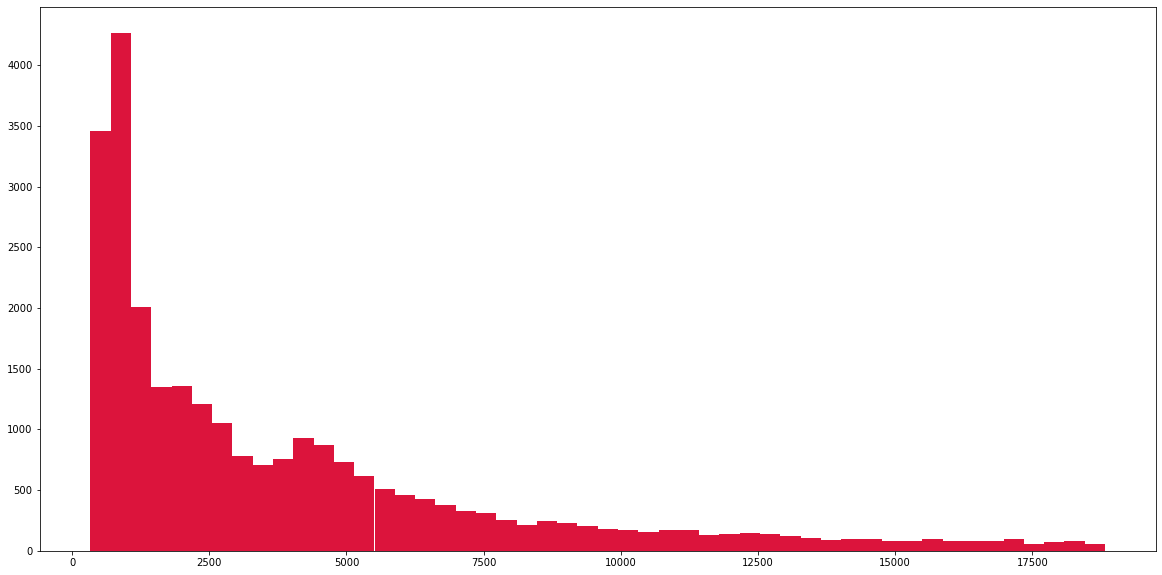

In [24]:
# объясняемая переменная - это цена

plt.figure(figsize=(20, 10)) 
plt.hist(y_train_float, color="crimson", bins = 50)

plt.show()




В левой части гистограммы располагаются небольшие значения целевой переменной, и объектов с таким значением в выборке довольно много (не забываем, что у нас тут не абстрактная математика в вакууме, мы тут цену алмазов предсказываем!); с увеличением значения таргета (целевой переменной) количество соответствующих объектов в выборке убывает. Сначала число объектов убывает довольно стремительно, но с некоторого момента разница в высоте между соседними столбцами уже почти незаметна. Такое явление называется "распределение с тяжёлым хвостом", и оно не очень желательно при построении модели.

Попробуем избавиться от тяжёлого хвоста. Для этого нужно применить к таргету какую-нибудь медленнорастущую биективную функцию, например логарифм. 

<!-- Однако вспомним, что мы намеренно отмасштабировали таргет таким образом, чтобы среди его значений был 0, поэтому нужно придумать ещё какое-то преобразование, чтобы все значения целевой переменной попали в область определения логарифма. -->

**4. [0,25 баллов]** Прологарифмируйте целевую переменную и нарисуйте график распределения логарифмированного таргета. Сильно ли он отличается от предыдущего графика? Попробуйте объяснить, почему явление "распределения с тяжёлым хвостом" нежелательно при построении модели.

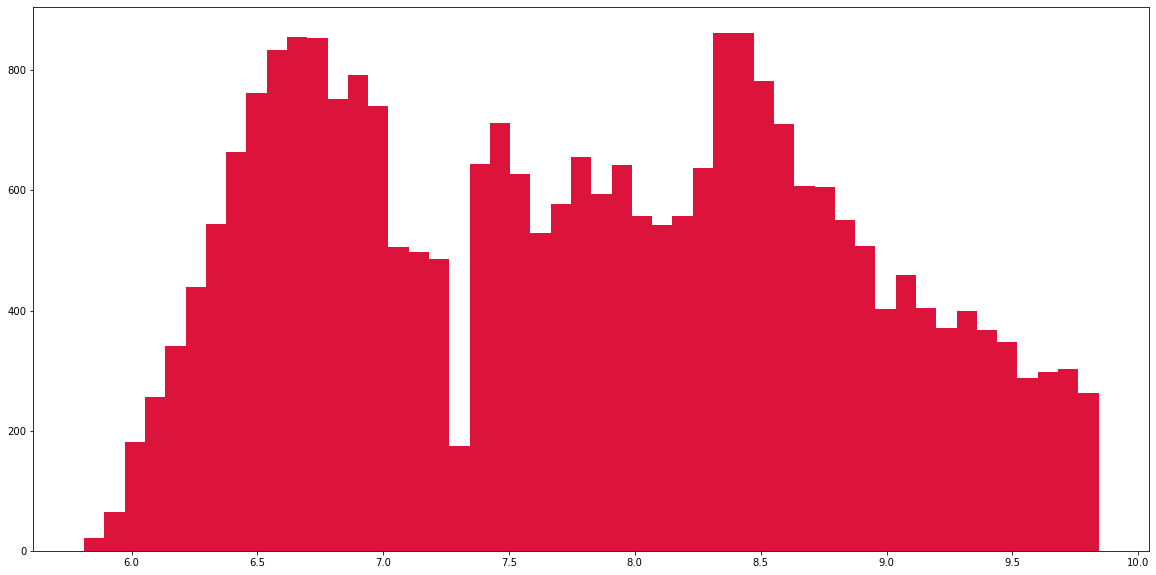

In [25]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
log_target = np.log(y_train_float)

plt.figure(figsize=(20, 10)) 
plt.hist(log_target, color="crimson", bins=50)

plt.show()



Ваше обоснование здесь: наверное, наша цель - предсказывать цены для **обычных** алмазов, а неравномерное убывание числа алмазов с большой ценой портит выборку. Вот тут несложно придумать пример из жизни или около того: если 50 человек зарабатывают по 50'000 рублей в месяц, а один, каким-то образом, 50'000'000 рублей в месяц, то средняя зарплата будет больше 1'000'000, что действительность отражает, мягко говоря, слабо. Вот этот вот пример иллюстрирует то, почему выборка с большим разбросом значений не будет очень репрезентативна. 

Есть еще одна мысль, которая, наверное, лучше подходит для наших моделей: в абсолютных величинах разница между показателями каратов может быть не очень большой, а вот в цены у таких алмазов различаться могут на порядки. Поэтому модель будет навешивать на караты большие коэффициенты, что придется компенсировать другими большими по модулю коэффициентами. В итоге, приходим к проблеме больших коэффициентов


Снова обучите линейную модель, считая целевой переменной логарифмированный таргет. Помните, что чтобы протестировать полученную линейную модель, важно взять экспоненту от полученных предсказаний.

In [26]:
res_coefs2, pred_test_y2, pred_train_y2 = predict_linear(X_train_num, np.log(y_train_float), X_test_num)
pred_test_y2 = np.exp(pred_test_y2)
pred_train_y2 = np.exp(pred_train_y2)
print(res_coefs2)

[ 0.68763929 -0.73978634  0.02345871 -0.00891653  1.13200348  0.01680622
  0.04767011]


Теперь построим график (чтобы наглядно посмотреть на отличия)

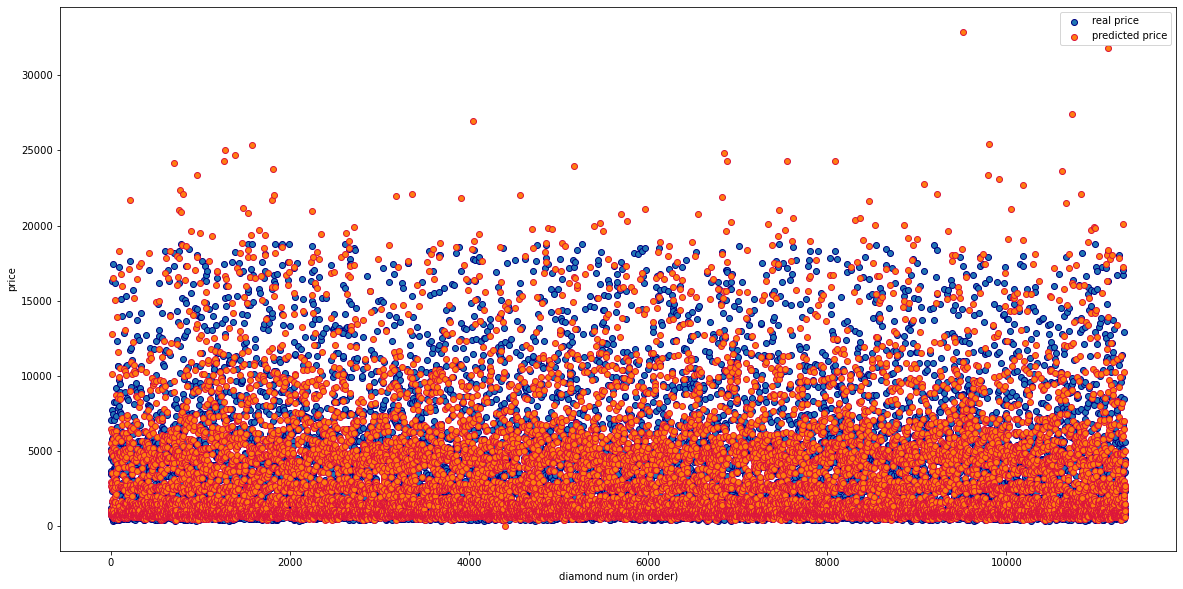

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))

plot_x = np.arange(y_test.size)



ax.scatter(plot_x, y_test_float, label="real price", edgecolor="navy")
ax.scatter(plot_x, pred_test_y2, edgecolor="crimson", label="predicted price")

plt.xlabel("diamond num (in order)")
plt.ylabel("price")

ax.legend()

plt.show()

Удалось ли добиться лучшего качества?

Чтобы это понять, сравним MSE

In [28]:
print("старая MSE на тестовых данных", MSE(pred_test_y1, y_test_float))
print("новая MSE на тестовых данных", MSE(pred_test_y2, y_test_float))
print("старая MSE на тренировочных данных", MSE(pred_train_y1, y_train_float ))
print("новая MSE на тренировочных данных", MSE(pred_train_y2, y_train_float ))


старая MSE на тестовых данных 2113575.91712056
новая MSE на тестовых данных 2514576.8902024818
старая MSE на тренировочных данных 2279751.0608263165
новая MSE на тренировочных данных 2873628.465934423


Еще хочется посмотреть на данные наглядно....

[4513, 6145, 6087, 10316, 1703, 726, 6473, 2130, 4987, 7905, 1332, 6739, 10297, 4432, 9432, 401, 1524, 8685, 5084, 1260, 6937, 10466, 9917, 6848, 10159, 6711, 4451, 5999, 2895, 6287]


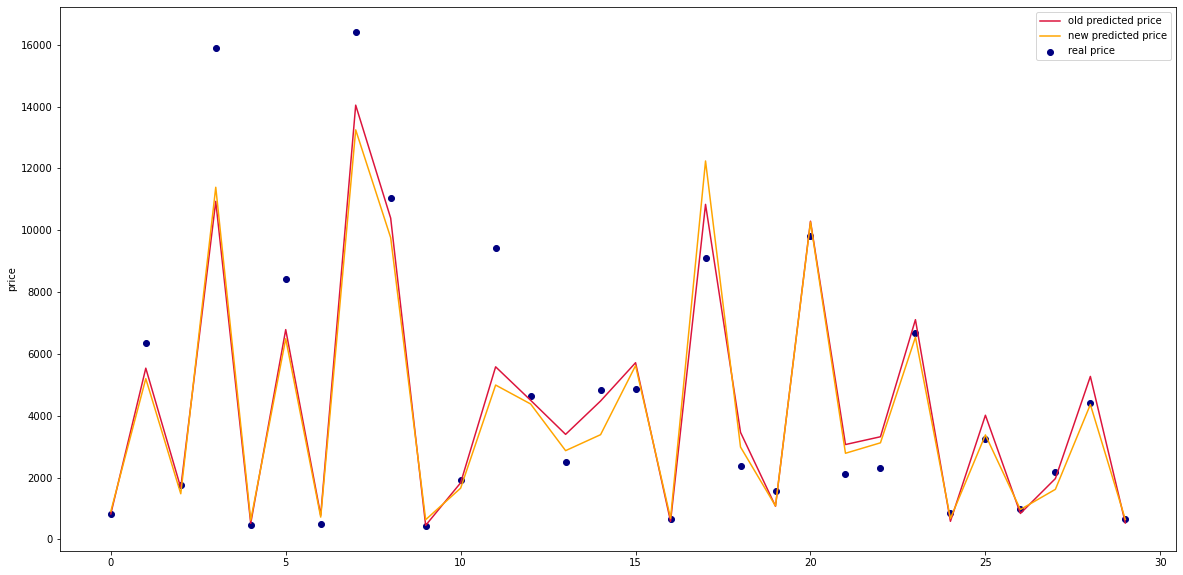

In [29]:
from random import randint

fig, ax = plt.subplots(figsize=(20, 10))

# на все сотни тысяч алмазов на графике смотреть смысла нет, посмотрим на 30


diamond_indicies = []
while len(diamond_indicies) < 30:
    diamond_indicies.append(randint(0, y_test_float.size - 1))
print(diamond_indicies)

plot_x = np.arange(30)


ax.scatter(plot_x, y_test_float.take(diamond_indicies), label="real price", color="navy")
ax.plot(plot_x, pred_test_y1.take(diamond_indicies), color="crimson", label="old predicted price")
ax.plot(plot_x, pred_test_y2.take(diamond_indicies), label="new predicted price", color="orange")


plt.ylabel("price")

ax.legend()

plt.show()

Ответ: в терминах среднеквадратичной ошибки - нет, если посмотреть на данные наглядно - почти всегла желтый график (график нового предсказания) ближе к правильной цене, чем график старого предсказания. А если это и не так, то, скорее всего оба предсказани от цели далеко

### Работаем с категориальными признаками

До сих пор мы работали с данными, которые представляются числами. Однако часто в датасетах объекты описываются не только признаками, содержащими числа, но и строковыми признаками, определяющими принадлежность объекта к некоторой категории. Такие признаки называются категориальными. Важно не выкидывать их из модели, потому что часто они содержат довольно полезную информацию об объекте, которую хорошая модель должна обязательно учитывать.

В этом разделе мы будем рассматривать только категориальные признаки, временно забыв про числовые.

Естесственно, нам нужно придумать, как закодировать категориальные признаки числами. Есть довольно много подходов к такой кодировке, но мы рассмотрим два самых базовых. Первая мысль, которая приходит в голову такая: давайте занумеруем все категории фиксированного признака, и заменим их строковое представление соответствующим численным.

**5. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OrdinalEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder(categories=[["Fair", "Good", "Very Good", "Premium", "Ideal"],
                                              ["J", "I", "H", "G", "F", "E", "D"], 
                                              ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]])
ordinal_cat_test = ordinal_enc.fit_transform(X_test_cat)
ordinal_cat_train = ordinal_enc.fit_transform(X_train_cat)

In [31]:
# обучаем модель

res_coefs4, pred_test_y4, pred_train_y4 = predict_linear(ordinal_cat_train, y_train_float, ordinal_cat_test)
print("MSE на тестовых данных", MSE(pred_test_y4, y_test_float))
print("MSE на тренировочных данных", MSE(pred_train_y4, y_train_float ))



MSE на тестовых данных 14772316.034174327
MSE на тренировочных данных 15152077.808426002


Подумайте, в чём потенциальные проблемы такого кодирования? (Подсказка: пусть изначально мы закодировали категорию A числом 1, а категорию B числом 2, а потом решили сделать наоборот: A <-> 2, B <-> 1. Подумайте, может ли измениться качество модели? А должно ли?)

Ваше обоснование здесь: да, может, у чисел, которые будут заменять категории могут не сохраняться какие-то нужные **признаки** (то есть 1 < 2, но не факт, что категория А должна быть хуже категории B, ну или по крайней мере нам интуитивно непонятно, почему товары категории A должны стоить меньше товаров категории B. Можно сказать, что выявить закономерность - наша цель, а навешивание чисел эту цель нам портит). Кроме того, могут быть категории, которые наоборот хорошо интерпретируются в численно виде: логично, что число для плохой огранки должно быть меньше числа для хорошей огранки. Но вот если менять местами, логика пропадет. 

В общем, если брать категории, про которые ничего не понятно, от таких изменений изменится качество. А быть так скорее не должно


Теперь давайте попробуем исправить недочёты такого способа кодирования категориальных признаков, придумав другой метод. Пусть некоторый признак имеет 4 различные категории: {A, B, C, D}. Заменим этот признак на 4 бинарных признака. Каждый из новых признаков будет являться индикатором одной из этих четырёх категорий: если некоторый объект имел категорию A, то после нашего кодирования значение признака, соответствующего категории А у этого объекта будет равно $1$, а значения оставшихся трёх признаков будут $0$. Небольшая иллюстрация: пусть так выглядела выборка до кодирования

| Объект | Признак |
| :----------:|:-:|
| X | "B" |
| Y | "D" |

А так будет выглядеть после кодирования:

| Объект | Признак == "A" | Признак == "B" | Признак == "C" | Признак == "D" |
| :----------:|:-:|:-:|:-:|:-:|
| X | 0 | 1 | 0 | 0 |
| Y | 0 | 0 | 0 | 1 |


**6. [0,3 баллов]** Реализуйте описанную выше процедуру кодирования для всех категориальных признаков в выборке. Вы можете сделать это самостоятельно, а можете разобраться в классе `OneHotEncoder` библиотеки `sklearn`. Обучите линейную модель на закодированных категориальных признаках и протестируйте. 

In [32]:
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(sparse=False)
onehot_cat_test = onehot_enc.fit_transform(X_test_cat)
onehot_cat_train = onehot_enc.fit_transform(X_train_cat)


In [33]:
# обучаем модель


res_coefs5, pred_test_y5, pred_train_y5 = predict_linear(onehot_cat_train,
                                                         y_train_float, onehot_cat_test,
                                                        to_delete=True)
print("MSE на тестовых данных", MSE(pred_test_y5, y_test_float))
print("MSE на тренировочных данных", MSE(pred_train_y5, y_train_float ))

res_coefs5

MSE на тестовых данных 14620759.56116205
MSE на тренировочных данных 14953769.322338184


array([ 4078.9638432 ,  -303.91068753,  -654.28339844,  -790.492359  ,
        -349.71757908, -1893.53720291, -1894.63707357, -1091.81235028,
        -823.9846534 ,  -531.06260441,   344.96778391,  1171.7407154 ,
         404.5104292 ,  1359.45437982,  2404.44312977,  1146.06121766,
        1369.95498696,   844.02828538])

Подумайте, в чём потенциальные проблемы такого кодирования? Какие недочёты прошлого метода кодирования исправляет предложенный способ? Какие недочёты есть у этого метода кодирования, которых нет у предыдущего? Который из двух методов выдаёт лучшее качество?

Ваше обоснование здесь: лучшее качество выдает второй метод. но возможные недостатки у него тоже есть: кажется, могут существовать категории, у которых должен быть вес (например, качество огранки, интуитивно интерпретируется как число). В то же время, могут быть и категории "без веса" (с алмазами пример не придумала, но вот если бы мы угадывали цены на столы, цвет стола (черный или белый) был бы такой категорией). Так вот, для первых круто, наверное, использовать первый тип кодирования, а для вторых -- второй

**7. [0,5 баллов]** Обучите линейную модель на всех данных, выполнив все необходимые преобразования. Постарайтесь добиться меньшей ошибки модели, чем во всех предыдущих заданиях.

Обучу две модели, одну - с первой кодировкой категорий, другую - со второй

In [34]:

test_ordinal_all = np.concatenate((ordinal_cat_test.astype(float), X_test_num), axis=1)
train_ordinal_all = np.concatenate((ordinal_cat_train.astype(float), X_train_num), axis=1)

# обучаем модель


res_coefs6, pred_test_y6, pred_train_y6 = predict_linear(train_ordinal_all,
                                                         y_train_float, test_ordinal_all)
print("MSE на тестовых данных", MSE(pred_test_y6, y_test_float))
print("MSE на тренировочных данных", MSE(pred_train_y6, y_train_float))


MSE на тестовых данных 1375106.6210095773
MSE на тренировочных данных 1496049.1095294855


Теперь построим модель со второй кодировкой. Кстати, если в процессе вычислений использовать не формулу с обратной матрицу, а псевдо обратную матрицу, ошибка уменьшится на несколько порядков и использовать второй способ кодирования категорий буде выгоднее. **Но на момент выполнения лабораторной был запрет на использование псевдо обратных матриц**, так что ошибка на модели со второй кодировкой окажется хуже. Почему так происходит - наверное, потому что вычисления очень сложные

In [35]:

test_onehot_all = np.concatenate((onehot_cat_test.astype(float), X_test_num), axis=1)
train_onehot_all = np.concatenate((onehot_cat_train.astype(float), X_train_num), axis=1)

# обучаем модель


res_coefs7, pred_test_y7, pred_train_y7 = predict_linear(train_onehot_all,
                                                         y_train_float, test_onehot_all,
                                                        to_delete=True)
print("MSE на тестовых данных", MSE(pred_test_y7, y_test_float))
print("MSE на тренировочных данных", MSE(pred_train_y7, y_train_float))



MSE на тестовых данных 1202526.449937482
MSE на тренировочных данных 1282572.9389932856


### Feature engineering

#### Описание задания.

В рамках этого задания вам предстоит улучшить модель и сделать предсказания на выборке из файла`diamonds_test.csv`, ответов к которой мы вам не дадим. Полученные предсказания вам нужно будет сдать в соревнование на сайте [kaggle.com](https://www.kaggle.com/c/hse-lab-linear-regression-21-22/overview). Подробнее о том, как сдавать предсказания, написано в конце раздела. Разумеется, чтобы иметь возможность сдать предсказания, вам нужно быть зарегистрированными на сайте. 

Оценка за задание рассчитывается исходя из ошибки полученных вами предсказаний и состоит из базовой части и бонусных баллов. Базовая часть оценки определяется следующими пороговыми значениями качества:

*   MSE $\leq 1950000$ ---- 0,25 балла
*   MSE $\leq 1370000$ ---- 0,5 балла
*   MSE $\leq 1280000$ ---- 0,75 балла
*   MSE $\leq 1170000$ ---- 1 балл

Если ваша модель выдаёт качество сильно лучше, чем требуется в пороге на 1 балл, то вы можете претендовать на бонусные баллы, приняв участие в полноценном соревновании, смысл которого в том, чтобы получить качество как можно лучше (добиться наименьшей возможной ошибки). 

Если вы хотите поучаствовать, то просто продолжайте улучшать вашу модель и сдавать предсказания в соревнование. Бонусные баллы будут рассчитываться на основе ошибки полученных вами предсказаний и вашей позиции в лидерборде соревнования. Как именно будет рассчитываться оценка --- мы вам сообщим после завершения соревнования. Точно можем сказать, что наибольшее число баллов за задание получит только один студент --- тот, кто будет находиться на первой позиции в лидерборде на момент дедлайна. Человек на следующем месте уже получит немного меньше, следующий --- ещё меньше, и так далее. Каждый студент, качество предсказаний которого хоть немного лучше нашего порога на 1 балл, обязательно получит бонусные баллы.

Чтобы подтвердить своё участие в соревновании, вам нужно будет сдать вашу модель вместе с лабораторной (лучше в отдельном файле, но можно её и прямо здесь написать).

**Максимум бонусных баллов за задание: 3**



---



В оставшейся части данного раздела приводятся несколько заданий, за выполнение котороых вы не получите баллов. Эти задания даны специально, чтобы вы посмотрели, какие есть идеи для дальнейшего улучшения модели.  Разумеется, мы не требуем от вас, чтобы ваша финальная модель следовала указаниям из этих заданий --- вы можете вообще не выполнять ни одного задания отсюда, оцениваться будут только сданные вами предсказания.





До сих пор мы только исследовали вопрос, как подготовить признаки из датасета, чтобы модель могла на их основе делать какие-то предсказания. При этом до сих пор мы никак не учитывали специфичность задачи: действительно, до этого момента нас интересовало только то, является ли признак числовым или категориальным, мы никак не учитывали физический смысл признаков. Однако часто датасеты предоставляют лишь самую общую информацию об объектах: признаки, которые легко измерить и запомнить. В таком случае при анализе данных нужно выдумывать собственные признаки, которые некоторым образом зависят от уже представленных в датасете признаков и **ни в коем случае не зависят от объясняемой переменной**.

В общем случае процесс придумывания новых признаков довольно творческий. Есть, конечно, некоторые более-менее общие подходы, позволяющие улучшить качество модели путём добавления новых признаков, но часто аналитики придумывают признаки, основываясь не только на известных эвристиках, но и на собственном представлении о жизни.

Давайте теперь поисследуем наши данные и подумаем, какие признаки можно добавить, чтобы улучшить модель.

**8.** Нарисуйте графики, отображающие зависимость цены алмаза от веса, длины, ширины и глубины (всего должно получиться 4 графика). Проинтерпретируйте наблюдаемую на них зависимость. Согласуется ли она с вашими представлениями о жизни?

*Примечание: для изображения зависимости одной величины от другой лучше всего подходит график типа scatter.*

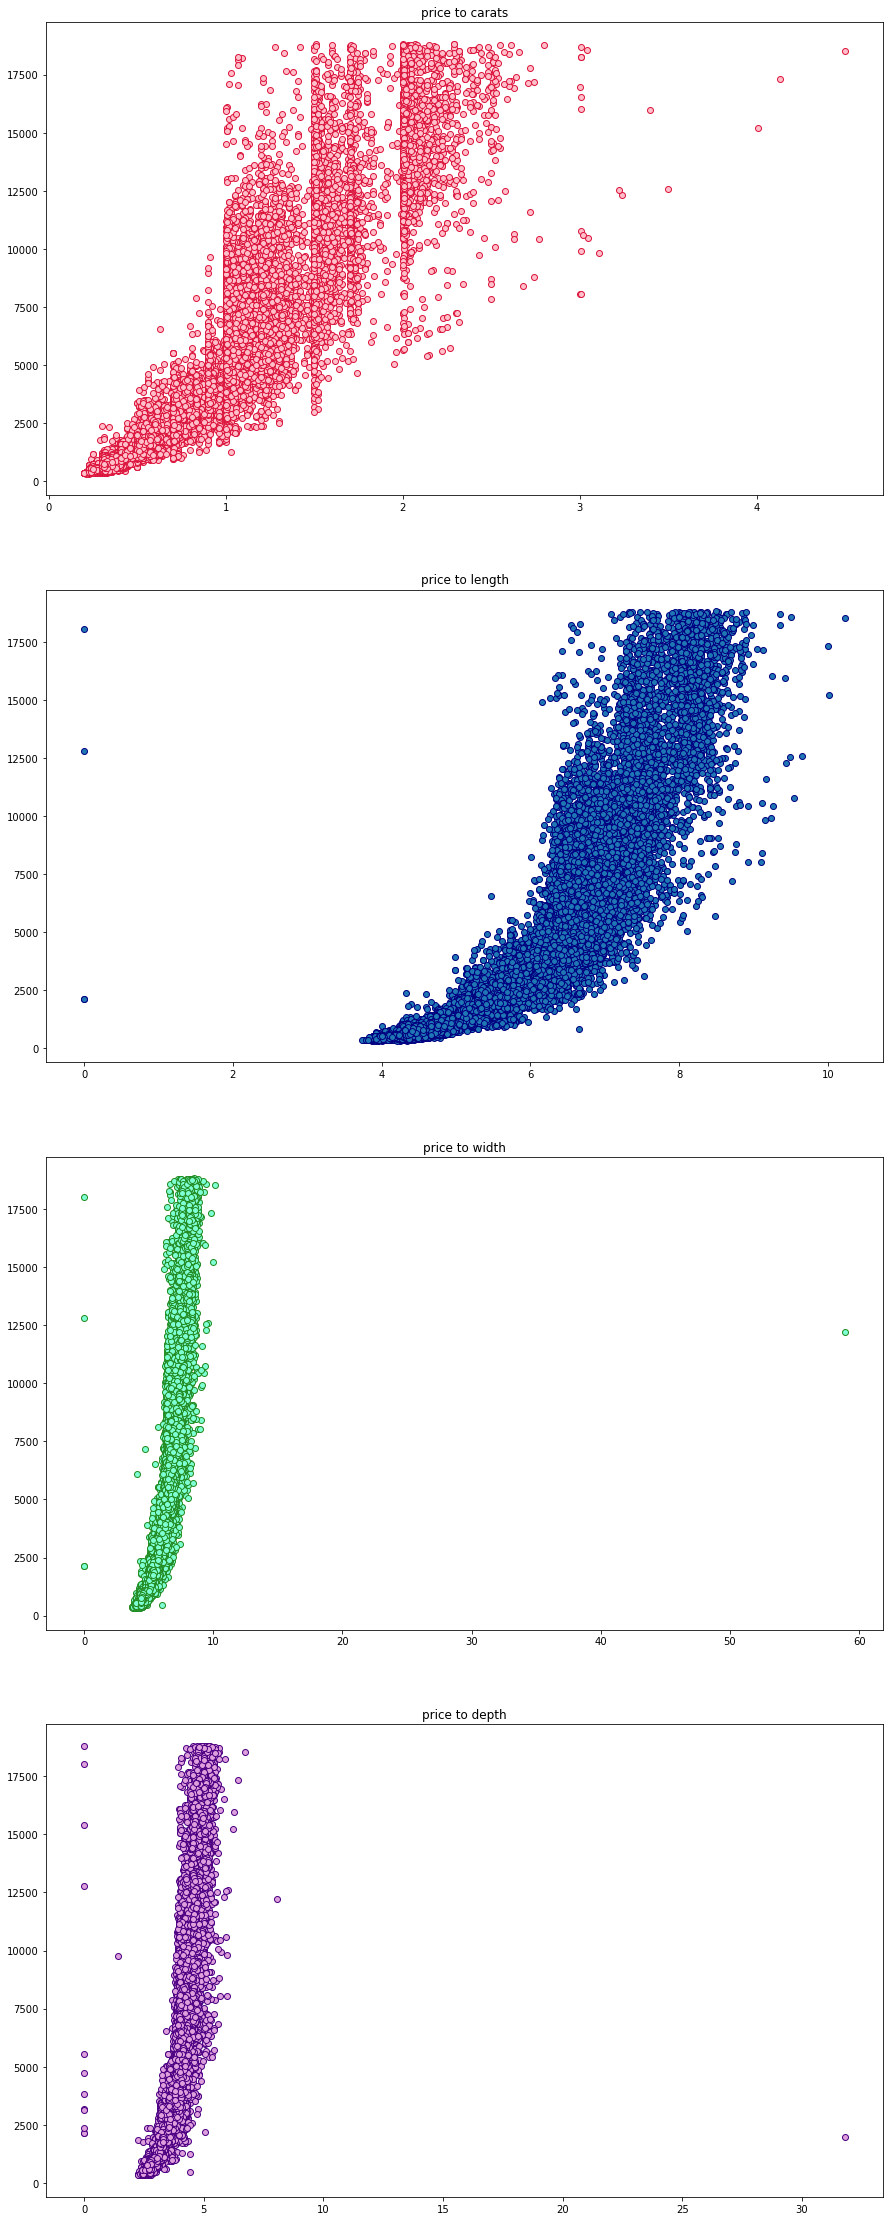

In [36]:
carats_price = np.concatenate((X[:, [0]].astype(float), y.reshape(y.size, 1).astype(float)), axis=1).T
carats_price = carats_price[carats_price[:, 0].argsort()]

x_price = np.concatenate((X[:, [6]].astype(float), y.reshape(y.size, 1).astype(float)), axis=1).T
x_price = x_price[carats_price[:, 0].argsort()]

y_price = np.concatenate((X[:, [7]].astype(float), y.reshape(y.size, 1).astype(float)), axis=1).T
y_price = y_price[carats_price[:, 0].argsort()]

z_price = np.concatenate((X[:, [8]].astype(float), y.reshape(y.size, 1).astype(float)), axis=1).T
z_price = z_price[carats_price[:, 0].argsort()]



fig, axs = plt.subplots(4, figsize=(15, 40))
axs[0].scatter(carats_price[0], carats_price[1], edgecolor="crimson", color="pink")
axs[0].set_title("price to carats")

axs[1].scatter(x_price[0], x_price[1], edgecolor="navy")
axs[1].set_title("price to length")

axs[2].scatter(y_price[0], y_price[1], edgecolor="forestgreen", color="aquamarine")
axs[2].set_title("price to width")

axs[3].scatter(z_price[0], z_price[1], edgecolor="indigo", color="plum")
axs[3].set_title("price to depth")




plt.show()

Подумайте, какую функцию можно применить к признакам, чтобы зависимость целевой переменной от них больше напоминала линейную?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**9.** На одном рисунке изобразите график зависимости целевой переменной от признака depth и график зависимости целевой переменной от признака table. Чтобы картинка получилась читаемой, сделайте графики полупрозрачными (параметр `alpha`). Что вы можете сказать о получившемся рисунке? Правда ли, что модели будет достаточно оставить только один из этих признаков? Убедитесь в этом, нарисовав аналогичные графики зависимости признаков depth и table от других числовых признаков.

*Примечание: почитайте про plt.subplots, чтобы узнать, как красиво рисовать несколько графиков.*

In [37]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Казалось бы, мы тут пытаемся придумать новые признаки, чтобы улучшить модель, зачем нам выбрасывать уже имеющиеся признаки? Дело в том, что если в выборке есть "похожие" в некотором смысле признаки, то модель, обученная на таких данных, может выдавать худший результат, чем если бы похожих признаков в выборке не было. Продемонстрируем это явление на практике.

**10.** Обучите линейную модель, предсказывающую цену алмазов на признаках x, y, z из наших данных. Замерьте качество полученной линейной модели на тестовой выборке, после чего добавьте признак $\tau = \frac{x}{2} + 4y - z + 1$, и снова обучите линейную модель. Которая из моделей добилась лучшего качества?

In [38]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Объясните, почему наличие похожих признаков в выборке заметно ухудшает качество, выдаваемое линейной моделью?

Ваше обоснование здесь: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы обсудили, исходя из каких соображений можно выбирать преобразования над имеющимися признаками и когда для модели может быть полезнее выкинуть некоторый признак из выборки, чем оставить его. Теперь давайте придумаем совсем новый признак. Для этого снова посмотрим на такие характеристики алмазов, как длина, ширина и глубина. Эти характеристики несомненно важны для предсказания цены алмазов, и все построенные нами модели находили какую-то закономерность, но теперь давайте мы попробуем их объединить в новом признаке `объём`. Для начала будем считать, что объём алмаза неплохо приближается объёмом параллелепипеда с такими же измерениями.

**11.** Обучите линейную модель на 4 признаках: x, y, z, и объём параллелепипеда со сторонами (x, y, z). Сравните качество полученной модели с качеством, выдаваемым моделью, обученной на признаках x, y, z.

In [39]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Понятно, что алмазы редко выглядят как идеальные параллелепипеды (хотя, конечно, многое зависит от огранки), и чаще встречаются алмазы, форма которых скорее напоминает эллипсоид. Снова обучите линейную модель на 4 признаках: x, y, z и объём эллипсоида с осями (x, y, z). Сравните полученную модель с предыдущей. Сильно ли отличается качество у этих моделей? Объясните, почему так получилось?

In [40]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если вам стало интересно, можете попробовать обучить модель, аппроксимируя объём алмаза объёмом тетраэдра. Впрочем, если вы ответили на предыдущий вопрос, вы уже наверняка представляете, что получится. В любом случае мы не настаиваем =)

Следующий трюк, который мы обсудим, --- это бинаризация признаков. Суть заключается в том, что мы берём некоторый признак из выборки и делаем из него несколько бинарных признаков (т.е. таких признаков, значения которых могут быть либо $0$, либо $1$). Частный случай бинаризации признаков мы уже разбирали, когда занимались кодированием категориальных признаков: тогда мы брали признак $P$, описывающий принадлежность объекта к одной из $N$ категорий ${A_1, \ldots, A_N}$, и делали из него $N$ признаков вида $[P = A_1], [P = A_2], \ldots [P = A_N]$.

Однако это не единственный способ бинаризовать признаки. Допустим $P$ --- числовой признак, тогда мы, например, можем выбрать $k$ порогов ${t_1, \ldots, t_k}$ и превратить признак $P$ в $k$ бинарных признаков $[P \leq t_1], [t_1 < P \leq t_2], \ldots, [t_{k-1} < P \leq t_k]$.

Если же у нас есть два признака $P$ и $F$, мы можем применять булевы операции к их бинаризациям, например $[P < t_1 \vee F > h_1], [t_2 < P \leq t_3 \wedge h_2 \leq F \leq h_3], [(P = t_4 \vee F = h_4) \wedge P \leq t_5]$, и т.д.

Давайте с помощью бинаризации выделим объекты, цена которых скорее всего будет высокой, и объекты, цена которых скорее всего будет низкой. Делать мы это будем на основе категориальных признаков (закодированных любым способом, однако если вы предпочитаете кодирование бинаризацией, т.е. второй способ, то при выполнении задания не забывайте, что признаки должны быть линейно независимы). Чтобы вы понимали, как именно категориальные признаки характеризуют алмазы, мы приложили вам картинку `categorical_descriptions`.

![](https://lh3.google.com/u/0/d/1xzqbnwyOazKNiiJxNo_AUh7iUsTONC-0=w1920-h1090-iv1)

**12.** Обучите линейную модель, предсказывающую цену алмазов на категориальных признаках из наших данных. Замерьте качество полученной линейной модели на тестовой выборке, после чего добавьте признаки, которые явно выделят алмазы, цена на которые скорее всего будет высокой, и алмазы, цена которых скорее всего будет низкой, и снова обучите линейную модель. Вы можете также добавить и свои признаки и использовать не только категориальные признаки (например, если вам захочется добавить признак "у алмаза лучшая чистота И алмаз совершенно бесцветный И объём алмаза не меньше $t$"). Удалось ли добиться прироста в качестве?

In [41]:
# ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

#### Как сдавать предсказания?

Передайте в написанную нами функцию `make_submission` ваши предсказания. Когда функция отработает, у вас в рабочей директории появится файл `submission.csv`, который вам и нужно сдать в соревнование.

In [42]:
def predict():
    X_test_kaggle = np.loadtxt("diamonds_test.csv", delimiter=",", dtype="str")[1:, :]
    kaggle_num = X_test_kaggle[:, numeric_features].astype(float)
    kaggle_cat = X_test_kaggle[:, categorical_features]
    
    
    kaggle_test_encoded = np.concatenate((onehot_enc.fit_transform(kaggle_cat).astype(float), kaggle_num), axis=1)
    kaggle_train_encoded = np.concatenate((onehot_enc.fit_transform(X_train_cat).astype(float), X_train_num), axis=1)

    # обучаем модель


    res_coefs_kaggle, pred_test_y_kaggle, pred_train_y_kaggle = predict_linear(kaggle_train_encoded,
                                                             np.log(y_train_float), kaggle_test_encoded, to_delete=True)


    return np.exp(pred_test_y_kaggle)




def make_submission(y_pred):
  file = np.arange(1, len(y_pred) + 1)
  file = file.reshape(-1, 1)
  file = np.concatenate([file, y_pred.reshape(-1, 1).astype(float)], axis=1)
  with open("submission.csv", "w") as f:
    f.write("id,price\n")
    np.savetxt(f, file, delimiter=",", fmt="%d,%10.5f")

# пример вызова функции:
make_submission(predict())

### Задание 3. Регуляризация (3.9 баллов)



Конечно, никто не гарантирует, что объясняемая переменная зависит от остальных характеристик именно линейно, поэтому мы можем неслабо улучшить модель, добавляя в неё нелинейные признаки на основе уже имеющихся. Один из наиболее распространённых подходов заключается в добавлении в выборку полиномиальных признаков некоторой фиксированной степени на основе уже имеющихся. Т.е., скажем, у нас есть признаки {P, F, G} и наша задача состоит в том, чтобы добавить в выборку полиномиальные признаки степени $2$ на основе имеющихся. Тогда мы добавим в выборку признаки

$$
P^2, F^2, G^2, PF, PG, FG.
$$

Аналогично для большего числа признаков и больших степеней.

**1. [0,4 баллов]** Реализуйте функцию `add_polynomial_features`, принимающую массив признаков, и степень, и возвращающую полиномиальные признаки заданной степени.

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations_with_replacement as combs

def add_polynomial_features(features, degree):
    polynomial_features = [[] for _ in range(len(features))]
    for i in range(len(features)):
        pows = []
        for comb in combs(features[i], degree):
            pows.append(np.prod(comb))
        polynomial_features[i] = pows
    return np.array(polynomial_features).T
    
    
    poly = PolynomialFeatures(degree, include_bias = False)
    X = poly.fit_transform(features)
    return np.split(X, [features.shape[1]], axis = 1)[1].T

poly_features = add_polynomial_features(data[:, [6, 7, 8]].astype(np.float64), 2)
assert poly_features.shape[0] == 6

Обучите линейную модель, добавив в выборку полиномиальные признаки степени $2$ от признаков carat и table. Сравните качество полученной модели с качеством модели из пункта 7 предыдущего задания.

In [44]:

test_poly_features = add_polynomial_features(X_test_num[:, [0, 2]], 2)
train_poly_features = add_polynomial_features(X_train_num[:, [0, 2]], 2)

poly1_test = np.concatenate((np.concatenate((onehot_cat_test.astype(float), 
                                            X_test_num), axis=1), test_poly_features.T),
                            axis=1)
poly1_train = np.concatenate((np.concatenate((onehot_cat_train.astype(float), 
                                              X_train_num), axis=1),  train_poly_features.T),
                            axis=1)



# обучаем модель


res_coefs8, pred_test_y8, pred_train_y8 = predict_linear(poly1_train,
                                                         y_train_float, poly1_test,
                                                        to_delete=True)
print("MSE на тестовых данных", MSE(pred_test_y8, y_test_float))
print("MSE на тренировочных данных", MSE(pred_train_y8, y_train_float))


MSE на тестовых данных 1178291.382696001
MSE на тренировочных данных 1260629.7546478212


Итак, мы узнали, что в выборку можно добавлять полиномиальные признаки от уже имеющихся числовых признаков и, как правило, это приводит к существенному приросту качества. Возникает естественный вопрос: почему бы не свести задачу построения линейной модели к подбору степени полиномиальных признаков? Ведь наверняка можно найти такую степень, при которой модель будет выдавать наилучшее возможное качество? Давайте исследуем этот вопрос.

**2. [0,3 баллов]** В этом задании вам нужно обучить 6 линейных моделей на полиномиальных признаках степеней от 1 до 6 от уже имеющихся признаков (carat, x, y, z). Нарисуйте график зависимости качества модели на обучающей и тестовой выборке от степени полиномиальных признаков в логарифмической шкале. Прокомментируйте полученный график: ожидали ли вы такого эффекта? 

[2918941.811763937, 1245256.8898141899, 3583291.8116496075, 1050633221.2270681, 285340452805.85706, 102484313826.97755]
[3068322.2271841196, 1296884.3671621068, 1251904.6131467582, 1031565167.6347867, 259384212530.51578, 50127950412.33529]


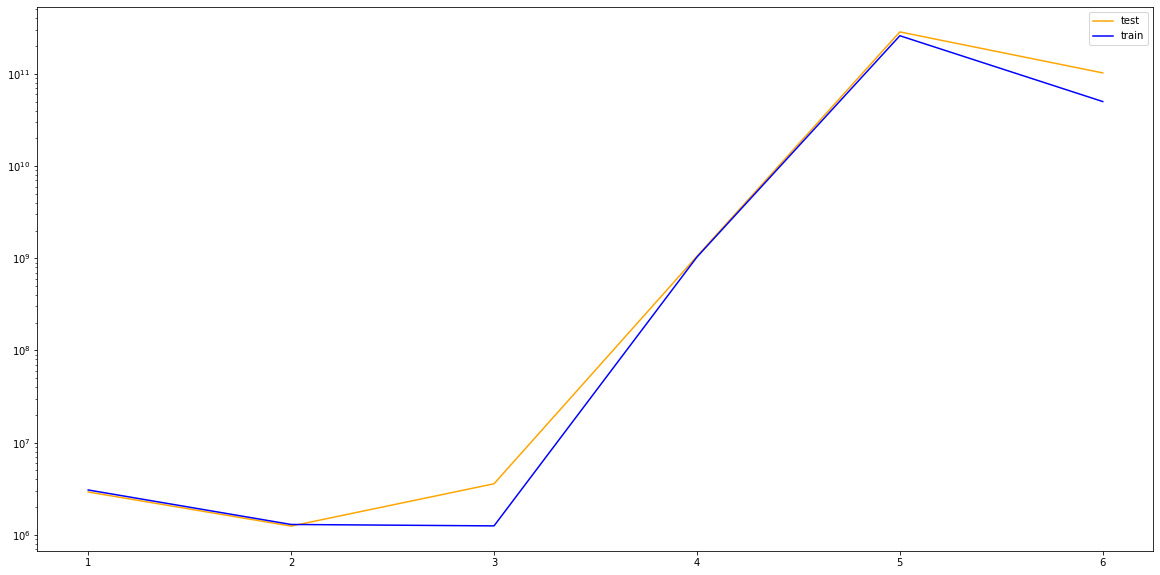

In [45]:
def solve_polynomial(degree):
    test_poly_features = add_polynomial_features(X_test_num[:, [0, 3, 4, 5]], degree)
    train_poly_features = add_polynomial_features(X_train_num[:, [0, 3, 4, 5]], degree)
    train_cat = ordinal_enc.fit_transform(X_train_cat)
    test_cat = ordinal_enc.fit_transform(X_test_cat)
    poly_test = np.concatenate((np.concatenate((test_cat.astype(float), 
                                            X_test_num), axis=1), test_poly_features.T),
                            axis=1)
    poly_train = np.concatenate((np.concatenate((train_cat.astype(float), 
                                              X_train_num), axis=1),  train_poly_features.T),
                            axis=1)
# обучаем модель


    coefs8, pred_test_y, pred_train_y = predict_linear(poly_train,
                                                             y_train_float, poly_test)
    return pred_test_y, pred_train_y

    


mses_test = []
mses_train = []

for k in range(1, 7):
    
    solution = solve_polynomial(k)
    mses_test.append(MSE(solution[0], y_test_float))
    mses_train.append(MSE(solution[1], y_train_float))
    
fig, ax = plt.subplots(figsize=(20, 10))

print(mses_test)
print(mses_train)
ax.semilogy(range(1, 7), mses_test, color="orange", label="test")
ax.semilogy(range(1, 7), mses_train, color="blue", label="train")
plt.legend()

plt.show()

На самом деле, не очень ожидала. Казалось, что больше признаков -- лучше точность

Наблюдаемый вами эффект называется переобучением: ситуация, когда модель становится слишком зависимой от обучающей выборки. Действительно, в процессе обучения модели мы стараемся минимизировать ошибку именно на обучающей выборке, и совершенно неочевидно, почему обученная модель будет обобщаться на объекты, которых она раньше не видела.

Когда мы начали добавлять в выборку полиномиальные признаки большой степени, модель стала настолько сложной, что обрела способность запомнить обучающую выборку вместо того, чтобы извлекать из неё какие-то закономерности. Как следствие, когда мы подали модели на вход выборку, отличную от обучающей, мы получили колоссальную ошибку.

Ситуация, когда качество модели на обучающей выборке гораздо ниже качества на тестовой выборке, является самым явным симптомом переобучения, но не единственным. Часто в ситуации переобучения можно наблюдать необычайно большие по модулю коэффициенты модели.

Есть много способов борьбы с этим злом. Один из них --- регуляризация. Сейчас мы рассмотрим одну из её разновидностей --- **L2-регуляризацию**. Идея в том, чтобы подправить матрицу $X^TX$, сделав её "получше". Например, это можно сделать, заменив её на $(X^TX + \lambda E)$, где $\lambda > 0$ --- некоторый скаляр. Пожертвовав точностью на обучающей выборке, мы тем не менее получаем численно более стабильное псевдорешение $a = (X^TX + \lambda E)^{-1}X^Ty$ и снижаем эффект переобучения. *Гиперпараметр* $\lambda$ нужно подбирать, и каких-то универсальных способов это делать нет, но зачастую можно его подобрать таким, чтобы ошибка на тестовой выборке падала.

Однако есть некоторые правила, которых стоит придерживаться при подборе коэффициента регуляризации. Обычно в такой ситуации всю выборку делят на три части: обучающую, *валидационную* и тестовую. Сначала по валидационной подбирают значение гиперпараметра, потом по обучающей строят модель, а по тестовой оценивают её итоговое качество. Кроме того, подбирать $\lambda$ нужно по логарифметической сетке, чтобы узнать оптимальный порядок величины.

**3. [0,1 балла]** Подумайте, почему не стоит подбирать коэффициент регуляризации по обучающей выборке? По тестовой выборке?

Ваше обоснование здесь: уель регуляризации в том, чтобы отойти от обучающей выборки, чтобы обобщить модель

**4. [0,3 балла]** Рассмотрим линейную можель с полиномиальными признаками степени $4$ от признаков (carat, x, y, z). Качество такой модели на обучающей выборке уже заметно лучше, чем качество на тестовой. Попробуем исправить эту ситуацию, применив $L2$-регуляризацию. Поделите вашу обучающую выборку на две части в соотношении $8:2$. Большую часть вы вновь объявите обучающей выборкой, а меньшую --- валидационной. Подберите гиперпараметр $\lambda$ по логарифмической сетке таким образом, чтобы линейная модель с "подправленной" матрицей Грама $X^TX$ выдавала лучшее качество на валидационной выборке. Обучите линейную модель с подобранным параметром $\lambda$ на обучающей выборке и протестируйте её на тестовых данных. Сделайте вывод: помогла ли нам регуляризация?

*Примечание: np.logspace вам в помощь.*

In [54]:
X_train_new, X_valid, y_train_new, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train_num_new = X_train_new[:, numeric_features].astype(float)
X_valid_num = X_valid[:, numeric_features].astype(float)
X_train_cat_new = X_train_new[:, categorical_features]
X_valid_cat = X_valid[:, categorical_features]

y_train_float_new = y_train_new.astype(float)
y_valid_float = y_valid.astype(float)



In [55]:
valid_poly = add_polynomial_features(X_valid_num[:, [0, 3, 4, 5]], 4)

vaid_encoded = np.concatenate((np.concatenate((onehot_enc.fit_transform(X_valid_cat).astype(float),
                                              X_valid_num), axis=1), valid_poly.T), axis=1)

valid_encoded = np.delete(vaid_encoded, 4, 1)
valid_encoded = np.delete(vaid_encoded, 10, 1)
valid_encoded = np.delete(vaid_encoded, 17, 1)

matrix = np.concatenate((np.ones(vaid_encoded.shape[0]).reshape((valid_encoded.shape[0], 1)), 
                         valid_encoded), axis=1)
Gram = np.dot(matrix.T, matrix)
grow_in_line = 0
final_lambda = 0
last_mse = 0
E = np.eye(Gram.shape[0])

min_error = 100000000000
l = 0.0000000001
for l in np.logspace(-5, 5, 300):
    k += 1
    coefs = np.dot(np.dot(sla.inv(Gram + l*E), matrix.T), y_valid_float.T)
    pred_y = np.dot(matrix, coefs)
    curr_mse = MSE(pred_y, y_valid_float)
    print(k, l,  curr_mse)
    if curr_mse < min_error :
        final_lambda = l
        min_error = curr_mse
   

print("final", final_lambda)

407 1e-05 29934107.34159931
408 1.080052374516254e-05 43801434.70444053
409 1.1665131316981961e-05 233473071.38829052
410 1.2598952777950285e-05 36497719.701357074
411 1.3607528864243332e-05 114825973.19147988
412 1.4696843861124474e-05 14669725.545058144
413 1.5873361110102085e-05 57074191.53603909
414 1.714406135851972e-05 9925070.48945552
415 1.851648417912154e-05 122713241.7364429
416 1.999877270535287e-05 14293012.485544251
417 2.159972194782717e-05 30652616.04987365
418 2.3328830978641584e-05 2907195.4410992316
419 2.5196359293170134e-05 3764530.7689464656
420 2.7213387683753087e-05 6534426.536651084
421 2.9391883986468844e-05 16618400.006282909
422 3.174477409109193e-05 11620707.981944883
423 3.428601863556583e-05 27838366.028409064
424 3.703069584005141e-05 4211882.714810216
425 3.999509097203661e-05 6524026.962448889
426 4.319679297334174e-05 2773420.7296700636
427 4.665479882234468e-05 5502311.965727519
428 5.0389626250651503e-05 2268583.7517346046
429 5.442343548300272e-05 2

599 26.387891048289294 1041741.3129267637
600 28.500304385181053 1044133.0831152721
601 30.7818214256508 1046731.4743994258
602 33.24597932270938 1049547.766415119
603 35.90739891061055 1052592.9880933934
604 38.7818714561072 1055877.995227218
605 41.88645235435271 1059413.0280715981
606 45.23956232538049 1063208.111638177
607 48.86109671160326 1067272.7864638967
608 52.77254352483532 1071616.0574620892
609 56.99711094326075 1076246.4835983834
610 61.55986501483502 1081172.592696956
611 66.48787838417263 1086401.941493846
612 71.81039092537341 1091942.5374319262
613 77.55898323389002 1097801.518839364
614 83.76776400682907 1103986.3495617255
615 90.47357242349293 1110504.2467982904
616 97.71619672696161 1117362.6466691548
617 105.5386103036523 1124568.6074573835
618 113.98722666160502 1132129.98611413
619 123.11217482038896 1140054.202700803
620 132.96759674662098 1148348.5691130639
621 143.61196859990773 1157020.7735717457
622 155.10844769528404 1166078.2252765629
623 167.525247240821

In [48]:
test_poly = add_polynomial_features(X_test_num[:, [0, 3, 4, 5]], 4)

test_encoded = np.concatenate((np.concatenate((onehot_enc.fit_transform(X_test_cat).astype(float),
                                                  X_test_num), axis=1), test_poly.T), axis=1)
    
test_encoded = np.delete(test_encoded, 4, 1)
test_encoded = np.delete(test_encoded, 10, 1)
test_encoded = np.delete(test_encoded, 17, 1)
    
    
train_poly = add_polynomial_features(X_train_num_new[:, [0, 3, 4, 5]], 4)

train_encoded = np.concatenate((np.concatenate((onehot_enc.fit_transform(X_train_cat_new).astype(float),
                                                  X_train_num_new), axis=1), train_poly.T), axis=1)
    
train_encoded = np.delete(train_encoded, 4, 1)
train_encoded = np.delete(train_encoded, 10, 1)
train_encoded = np.delete(train_encoded, 17, 1)

    
train_rows = X_train_new.shape[0]
test_rows = X_test.shape[0]
    
train_matrix = np.concatenate((np.ones(train_rows).reshape((train_rows, 1)), train_encoded), axis=1)
test_matrix = np.concatenate((np.ones(test_rows).reshape((test_rows, 1)), test_encoded), axis=1)
 
    
print(train_matrix.T.shape)
    
coefs = np.dot(np.dot(sla.inv(np.dot(train_matrix.T, train_matrix) + final_lambda*np.eye(train_matrix.shape[1])), 
                          train_matrix.T), y_train_float_new)
    
    
    
pred_y_test = np.dot(test_matrix, coefs)
pred_y_train = np.dot(train_matrix, coefs)
    
    
print("test mse", MSE(pred_y_test, y_test_float))
print("train mse", MSE(pred_y_train, y_train_float_new))

(59, 21144)
test mse 265672359.9473932
train mse 260358359.1067253


По сути, стала! MSE уменьшилась на порядок (старую ошибку см в прошлой таске)

**5. [0,5 балла]** Повторите первое задание, но вместо 6 обычных линейных моделей обучите 6 регуляризованных линейных моделей. Для каждой модели вам нужно будет подобрать свой гиперпараметр $\lambda$. Сравните полученный график с графиком из первого задания: для всякой ли степени мы смогли улучшить ситуацию? Как выдумаете, почему?

In [56]:
def find_lambda(Gram, matrix, y):
    res = 0
    E = np.eye(Gram.shape[0])
    min_error = 100000000000
    l = 0.0000000001
    for l in np.logspace(-5, 5, 100):
        coefs = np.dot(np.dot(sla.inv(Gram + l*E), matrix.T), y.T)
        pred_y = np.dot(matrix, coefs)
        curr_mse = MSE(pred_y, y_valid_float)
        if curr_mse < min_error :
            res = l
            min_error = curr_mse
    return res

6.428073117284319e-05
(14, 21144)
1e-05
(20, 21144)
1e-05
(30, 21144)
0.00210490414451202
(45, 21144)
0.08697490026177834
(66, 21144)
5.72236765935022
(94, 21144)
[1523624.205269962, 1310095.682477198, 1258365.4685388517, 27778852.14668778, 71763037674.08406, 237455578577.04404]
[1377269.3185515478, 1248336.9359694321, 3144638.8672963656, 32978569.749448985, 71318576499.23352, 235592502871.57547]


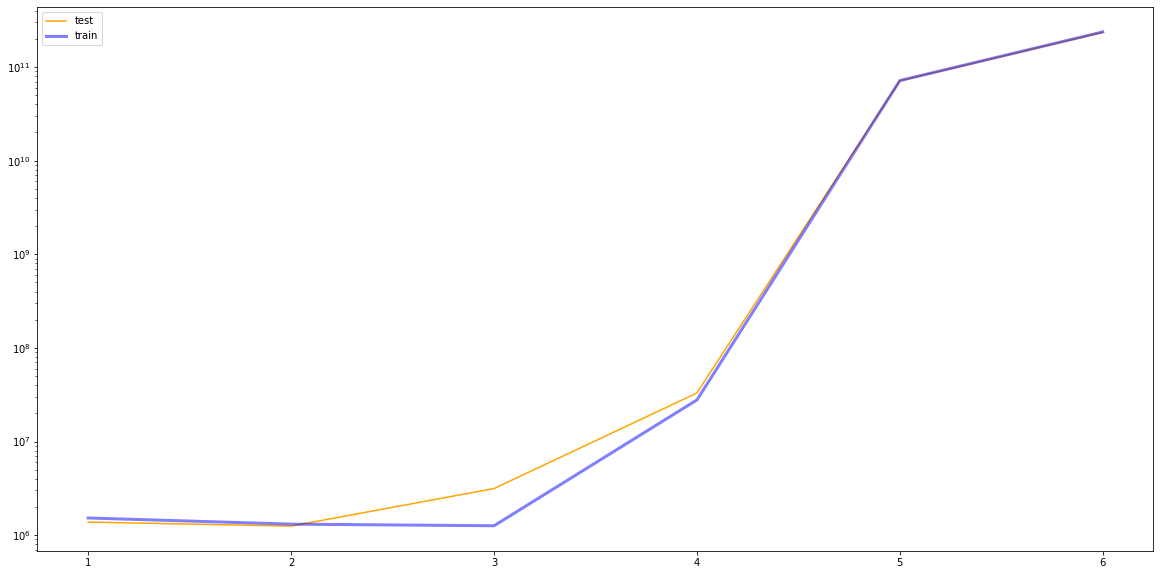

In [57]:
# mse для 1 мы уже знаем
mses_test = []
mses_train = []
lambdas = []


for k in range(1, 7):
    valid_poly = add_polynomial_features(X_valid_num[:, [0, 3, 4, 5]], k)

    vaid_encoded = np.concatenate((np.concatenate((onehot_enc.fit_transform(X_valid_cat).astype(float),
                                                  X_valid_num), axis=1), valid_poly.T), axis=1)

    valid_encoded = np.delete(vaid_encoded, 4, 1)
    valid_encoded = np.delete(vaid_encoded, 10, 1)
    valid_encoded = np.delete(vaid_encoded, 17, 1)
    
    matrix = np.concatenate((np.ones(vaid_encoded.shape[0]).reshape((valid_encoded.shape[0], 1)), 
                             valid_encoded), axis=1)
    Gram = np.dot(matrix.T, matrix)
    lam = find_lambda(Gram, matrix, y_valid_float)
    
    print(lam)
    
    test_poly = add_polynomial_features(X_test_num[:, [0, 3, 4, 5]], k)

    test_encoded = np.concatenate((np.concatenate((ordinal_enc.fit_transform(X_test_cat).astype(float),
                                                  X_test_num), axis=1), test_poly.T), axis=1)
    
    
    train_poly = add_polynomial_features(X_train_num_new[:, [0, 3, 4, 5]], k)

    train_encoded = np.concatenate((np.concatenate((ordinal_enc.fit_transform(X_train_cat_new).astype(float),
                                                  X_train_num_new), axis=1), train_poly.T), axis=1)

    
    train_rows = X_train_new.shape[0]
    test_rows = X_test.shape[0]
    
    train_matrix = np.concatenate((np.ones(train_rows).reshape((train_rows, 1)), train_encoded), axis=1)
    test_matrix = np.concatenate((np.ones(test_rows).reshape((test_rows, 1)), test_encoded), axis=1)
 
    
    print(train_matrix.T.shape)
    
    coefs = np.dot(np.dot(sla.inv(np.dot(train_matrix.T, train_matrix) + lam*np.eye(train_matrix.shape[1])), 
                          train_matrix.T), y_train_float_new)
    
    
    
    pred_y_test = np.dot(test_matrix, coefs)
    pred_y_train = np.dot(train_matrix, coefs)
    
    mses_test.append(MSE(pred_y_test, y_test_float))
    mses_train.append(MSE(pred_y_train, y_train_float_new))
  
    
fig, ax = plt.subplots(figsize=(20, 10))

print(mses_train)
print(mses_test)
ax.semilogy(range(1, 7), mses_test, color="orange", label="test")
ax.semilogy(range(1, 7), mses_train, color="blue", label="train", linewidth=3, alpha=0.5)
plt.legend()

plt.show()

Мы не смогли (ощутимо) улучшить модель только для 5 и 6 степеней. Наверное, там побольше переобучение и модель еще меньше похода на линейную

**6. [1,15 балла]** Пусть заданы $X\in \text{Mat}_{n \times k}(\mathbb{R})$, $\lambda \geqslant 0$, а также известно, что $\text{rk}~X = k \leqslant n$. Решите следующую задачу оптимизации:
$$|Xa - y|^2 + \lambda|a|^2\rightarrow\min\limits_{a \in \mathbb{R}^k}.$$

Заметим, что первое слагаемое --- это значение mean-square error (с точностью до домножения на некоторую константу) модели с коэффициентами $a = (a_1, \ldots, a_k)$. Типичной задачей линейной регрессии является минимизация первого слагаемого по всем векторам $a$. Однако в данном случае кроме минимизации среднеквадратичной ошибки мы также добавляем условие, что при этом и веса модели должны быть как можно меньше. Действительно, мы уже убедились, что чем сложнее модель, тем меньше будет ошибка на обучающей выборке (а именно это ошибку мы и минимизируем в процессе обучения) и тем вероятнее модель будет иметь большие по модулю коэффициенты, а значит, и большое значение $|a|$. Добавляя второе слагаемое в рассматриваемый выше функционал, мы как бы задаём ограничение на абсолютную величину коэффициентов модели. При этом параметр $\lambda$ явно будет указывать, насколько сильно мы будем штрафовать модель за большие коэффициенты. Заметим, что если $\lambda = 0$, то мы получаем классическую задачу линейной регресии без регуляризации.

Ваше решение здесь: 


$|Xa - y|^2 + \lambda|a|^2 = 
\left|\begin{pmatrix} 
x_{11} & x_{12}& \ldots & x_{1k} \\
x_{21} & x_{22} & \ldots & x_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \ldots & x_{nk}
\end{pmatrix} 
\begin {pmatrix} 
a_1 \\
a_2 \\
\vdots \\ 
a_k
\end{pmatrix}
- 
\begin{pmatrix}
y_1 \\ 
y_2 \\
\vdots \\
y_n
\end{pmatrix}
\right|^2 + \lambda \left| 
\begin {pmatrix} 
a_1 \\
a_2 \\
\vdots \\ 
a_k
\end{pmatrix} \right|^2 = 
\left|\begin{pmatrix} 
\sum^k_{i = 1} (x_{1i}a_i) - y_1\\
\sum^k_{i = 1} (x_{2i}a_i) - y_2\\
\vdots \\ 
\sum^k_{i = 1} (x_{ni}a_k) - y_n\\
\end{pmatrix} 
\right|^2 + \lambda \left| 
\begin {pmatrix} 
a_1 \\
a_2 \\
\vdots \\ 
a_k
\end{pmatrix} \right|^2 = 
\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}) - y_j)^2 + \lambda\sum_{q = 0}^{k}a_q^2
$

У нас получилась функция от переменных $a_i$, которая на $+- \infty$ стремится к бесконечности. 

Чтобы ее минимизировать, продифференцируем по всем переменным $a_i$: зафиксируем какое-то $i = t$:

$(\lambda\sum_{q = 0}^{k}a_q^2)' = 0 + 0 + ... + 2\lambda a_t + 0 + ... + 0 = 2\lambda a_t$


$(\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}) - y_j)^2)' =
2(\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}) - y_j))(0 + 0 + ... + x_{jt} + 0 + ... + 0) = 
2(\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}) - y_j))x_{jt}
$

Для всякого $t$ приравняем производные к 0 и получим много ($n$) уравнений:

$2(\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}) - y_j))x_{jt} +  2\lambda a_t = 0 \Leftrightarrow
\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}) - y_j))x_{jt} +  \lambda a_t = 0 \Leftrightarrow
\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}))x_{jt} -\sum_{j = 1}^n y_jx_{jt} +  \lambda a_t = 0 \Leftrightarrow
\sum_{j = 1}^n y_jx_{jt} = \sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}))x_{jt}  + \lambda a_t 
$ 

$
\sum_{j = 1}^n y_jx_{jt} = [X^Ty]_{tj}$

$
\sum_{j = 1}^n(\sum_{i = 1}^{k}(a_ix_{ji}))x_{jt} = 
[X^TXa]_{tj} 
$

$
[X^Ty]_{tj} = \lambda a_t  + [X^TXa]_{tj} \forall 0 < t \leq k \Rightarrow
$

$
X^Ty = \lambda a  + X^TXa \Leftrightarrow X^Ty = \lambda E a  + X^TXa \Leftrightarrow 
X^Ty = (\lambda E  + X^TX)a \Leftrightarrow a = (\lambda E  + X^TX)^{-1}X^Ty
$


**7. [0,25 балла]** При построении линейной модели у вас, как правило, есть также и свободный член, не зависящий от признаков из выборки. Подумайте, почему регуляризовать свободный член — плохая идея?

( ͡° ͜ʖ ͡° )つ──☆*: Насколько я понимаю, свободный член - константа, которая нужна, чтобы точнее попадать в цену. можно сказать, что это коэффициент при регрессоре, который одинаков для всех объектов (и равняется одному). Тогда вычитая из него некоторую константу/ прибавляя к нему константу, мы не получим много разных полезных коэффициентов, мы получим просто другую константу, которая лишь отдалит предсказание от истины


**8. [0,5 балла]** Пусть теперь $\text{rk}~X < k$. Всегда ли в этом случае существует решение? Если существует, то является ли оно единственным? Ответ обоснуйте.

Ваше обоснование здесь: Кажется, всегда можно подобрать скаляр так, чтобы $X^TX+\lambda E$ была невырожденной, наверное, при добавлении таких лямбд к изначально невырожденной матрице крутой точности мы бы не добились, но тем не менее такие существуют. Наверное, их бесконечно много, так как числа можно выбирать вот вообще любые (но сильно точность пострадает конечно)


А сейчас будет **пример**: возмем вырожденную маленькую $X$ и поподбираем скаляры 

In [51]:
X = np.array([[1, 2, 3], [4, 1, 4], [16, 4, 16]]) # 2 и 3 строка пропорциональны, матричка вырождена
y = np.array([1, 3, 5]) 

matrix = np.concatenate((np.ones(3).reshape((3, 1)), 
                         X), axis=1)
Gram = np.dot(matrix.T, matrix)
grow_in_line = 0
final_lambda = 0
last_mse = 0
E = np.eye(Gram.shape[0])
min_error = 100000000000
l = 0.0000000001
while l <10:
    if sla.det(Gram + l*E)!= 0:
        print(l)
    l *= 2
    


1e-10
2e-10
4e-10
8e-10
1.6e-09
3.2e-09
6.4e-09
1.28e-08
2.56e-08
5.12e-08
1.024e-07
2.048e-07
4.096e-07
8.192e-07
1.6384e-06
3.2768e-06
6.5536e-06
1.31072e-05
2.62144e-05
5.24288e-05
0.0001048576
0.0002097152
0.0004194304
0.0008388608
0.0016777216
0.0033554432
0.0067108864
0.0134217728
0.0268435456
0.0536870912
0.1073741824
0.2147483648
0.4294967296
0.8589934592
1.7179869184
3.4359738368
6.8719476736


Как мы видим, получилось много лямбд, на которых будут существовать коэффициенты

**9. [0,4 балла]** Покажите, что если решений бесконечно много, то среди них обязательно найдутся решения со сколь угодно большими по модулю компонентами вектора $a$.

Ваше обоснование здесь: Мы, в общем-то, не ограничены в выборе лямбд, так что найти такие скаляры, чтобы кадоре значение в $(X^TX + \lambda E)X^Ty$ было как можно больше

### Добавление. QR-разложение

## **QR-разложением** матрицы $A$ (не обязательно квадратной) мы будем называть её представление в виде $A = QR$, где $Q$ — матрица с ортонормированными столбцами, а $R$ - верхнетреугольная матрица.

Смысл QR-разложения следующий. Пусть $a_1,\ldots,a_m$ — столбцы матрицы $A$, $q_1,\ldots,q_t$ — столбцы матрицы $Q$. Тогда $q_1,\ldots,q_t$ — это ортонормированный базис в подпространстве, являющемся линейной оболочкой векторов $a_1,\ldots,a_m$, а в матрице $R$ записаны коэффициенты, с помощью которых $a_i$ выражаются через $q_1,\ldots,q_t$.

Находить QR-разложение заданной матрицы можно разными способами. Мы познакомим Вас не с самым лучшим из них, но по крайней мере с наиболее простым концептуально. Заметим, что ортогональный базис линейной оболочки можно найти с помощью ортогонализации Грама-Шмидта. При этом коэффициенты из матрицы $R$ получаются в качестве побочного продукта этого процесса:

```python
for j = 1...n:
    q_j = a_j
    for i = 1,...,j-1:
        r_ij = (q_i, a_j)
        q_j = q_j - r_ij * q_i
    r_jj = |q_j|
    if r_jj == 0: # a_j in <a_1,...,a_j-1>
        # What would you do in this case?..
    q_j = q_j / r_jj
```

Для нахождения QR-разложения Вы можете использовать библиотечную функцию `scipy.linalg.qr`.

Поскольку лабораторная про линейную регрессию, не так-то просто замять вопрос о том, какое же отношение QR-разложение имеет к задаче регрессии. Упомянем одно из возможных применений.

Допустим, мы нашли QR-разложение матрицы $X$, а именно: $X = QR$. Тогда
$$X^TX = (QR)^T(QR) = R^TQ^TQR = R^TR$$

Поскольку в задаче регрессии матрица $X$ обычно полного ранга (то есть её столбцы линейно независимы), матрица $R$ будет квадратной. Благодаря этому нашу обычную формулу для набора регрессионных коэффициентов $\hat{a}$ можно переписать в следующем виде:

$$\hat{a} = (X^TX)^{-1}X^Ty = (R^TR)^{-1}(QR)^Ty = R^{-1}(R^T)^{-1}R^TQ^Ty = R^{-1}Q^Ty$$

Как видите, формула стала проще. Более того, зачастую обращение матрицы $R$ может быть численно более устойчиво, чем обращение матрицы $X^TX$.